# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")
path = ""

Mounted at /content/gdrive/


# Libraries and Components

In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import json
import tensorflow as tf
import pandas as pd
import time
import os
import numpy as np
from datetime import datetime
import requests
from requests_oauthlib import OAuth1
from pathlib import Path
import re
import urllib

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!pip install cryptowatch-sdk
import cryptowatch as cw

###Credentials

In [ ]:
cw_key = ""

In [ ]:
#Twitter API OAuth1 keys
twauth1 = OAuth1('', '', '', '')

#Util

Time Conversion

In [ ]:
def time_twitter_to_dt(str):
  return datetime.strptime(str, '%Y-%m-%dT%H:%M:%S.%fZ')
def time_unix_to_dt(int):
  return datetime.fromtimestamp(int)
def time_dt_to_unix(dtObj):
  return int(dtObj.timestamp())
def time_twitter_to_unix(str):
  return int(datetime.strptime(str, '%Y-%m-%dT%H:%M:%S.%fZ').timestamp())
def create_twitter_time(Y, M, D, h = 0, m = 0, s = 0):
  return str(Y).zfill(4) + '-' + str(M).zfill(2) + '-' + str(D).zfill(2) + 'T' + str(h).zfill(2) + ':' + str(m).zfill(2) + ':' + str(s).zfill(2) + 'Z'
def create_unix_time(Y, M, D, h = 0, m = 0, s = 0):
  return int(datetime(Y, M, D, h, m, s).timestamp())

String Conversion

In [ ]:
def encode_str_url(string):
  return urllib.parse.quote_plus(string)

# Twitter API

##Retrieve Tweets



[Get Tweets by Specific Timelines
](https://developer.twitter.com/en/docs/twitter-api/tweets/timelines/api-reference/get-users-id-tweets)

In [ ]:
def retrieve_tweets_timeline(id, start_time, end_time, name):
  link = 'https://api.twitter.com/2/users/' + id + '/tweets?tweet.fields=id,created_at&max_results=100' + '&start_time=' + start_time + '&end_time=' + end_time
  tweet = requests.get(link, auth=twauth1)
  tweets = json.loads(tweet.text)
  if 'data' in tweets:
    tweets = tweets['data']
    print('Success')
    with open(path + 'tweets/tweets_timeline/' + name +'.json', 'w') as outfile:
      json.dump(tweets,outfile)
  else:
    print('Bad Request')

In [ ]:
user_ids = {'elonmusk': '44196397', 'jack': '12' , 'justinsuntron': '902839045356744704', 'rogerkver': '176758255', 'aantonop': '1469101279', 'ErikVoorhees': '61417559', 'bgarlinghouse': '28582680', 'BarrySilbert': '396045469', 'VitalikButerin': '295218901', 'CoinDesk': '1333467482', 'Cointelegraph': '2207129125', 'todayonchain': '981416882875125762', 'newsbtc': '2150123534', 'BitcoinMagazine': '361289499', 'CryptoSlate': '893284234042855424', 'bitcoinist': '2338070737', 'nulltxnews': '2509810398', 'BitcoinCom': '380069391', 'CryptovestMedia': '913315593750683648', 'iiblockchain': '912906507431432193', 'blockonomi': '34351198', 'coinspeaker': '2379303330'}

In [ ]:
counter = 0
for id in user_ids:
    retrieve_tweets_timeline(user_ids[id], encode_str_url(create_twitter_time(2021, 2, 1)), encode_str_url(create_twitter_time(2021, 3, 1)), str(counter).zfill(3))
    counter += 1
    retrieve_tweets_timeline(user_ids[id], encode_str_url(create_twitter_time(2021, 3, 1)), encode_str_url(create_twitter_time(2021, 4, 1)), str(counter).zfill(3))
    counter += 1
    retrieve_tweets_timeline(user_ids[id], encode_str_url(create_twitter_time(2021, 4, 1)), encode_str_url(create_twitter_time(2021, 5, 1)), str(counter).zfill(3))
    counter += 1
    retrieve_tweets_timeline(user_ids[id], encode_str_url(create_twitter_time(2021, 5, 1)), encode_str_url(create_twitter_time(2021, 6, 1)), str(counter).zfill(3))
    counter += 1
    retrieve_tweets_timeline(user_ids[id], encode_str_url(create_twitter_time(2021, 6, 1)), encode_str_url(create_twitter_time(2021, 6, 18)), str(counter).zfill(3))
    counter += 1

[Get Tweets by Keywords](https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-recent)

In [ ]:
def retrieve_tweets_keyword(query, start_time, end_time, name):
  link = 'https://api.twitter.com/2/tweets/search/recent?query=' + query +'&start_time=' + start_time + '&end_time=' + end_time +'&tweet.fields=id,created_at&max_results=100'
  tweet = requests.get(link, auth=twauth1)
  tweets = json.loads(tweet.text)
  if 'data' in tweets:
    tweets = tweets['data']
    print('Success')
    with open(path + 'tweets/tweets_keyword/' + name +'.json', 'w') as outfile:
      json.dump(tweets,outfile)
  else:
    print('Bad Request')

In [ ]:
#The recent search endpoint returns Tweets from the LAST SEVEN DAYS that match a search query.

counter = 0
query = 'bitcoin%20OR%20Bitoin%20OR%20BitCoin%20OR%20BITCOIN%20OR%20crypto%20OR%20Crypto%20OR%20CRYPTO%20OR%20BTC%20OR%20btc%20OR%20Btc'

for day in range(11, 18):
  for hour in range(0, 24, 4):
    if hour == 20:
      retrieve_tweets_keyword(query, encode_str_url(create_twitter_time(2021, 6, day, hour)), encode_str_url(create_twitter_time(2021, 6, day + 1, 0)), str(counter).zfill(3))
    else:
      retrieve_tweets_keyword(query, encode_str_url(create_twitter_time(2021, 6, day, hour)), encode_str_url(create_twitter_time(2021, 6, day, hour + 4)), str(counter).zfill(3))
    counter += 1


##Clear Up Text

Remove URL

In [ ]:
def remove_url(indir, outdir):
  with open(indir) as tjs:
    tweets = json.load(tjs)
    for tweet in tweets:
      tweet['text'] = re.sub(r"\S*https?:\S*", "", tweet['text'], flags=re.MULTILINE)
    with open(outdir, 'w') as out:
      json.dump(tweets, out)

In [ ]:
counter = 0
files = os.listdir(os.path.join(path, 'tweets/tweets_timeline/'))
for file in files:
  remove_url(path + 'tweets/tweets_timeline/' + file, path + 'tweets/tweets_timeline_clear/' + str(counter).zfill(3) + '.json')
  counter += 1

files = os.listdir(os.path.join(path, 'tweets/tweets_keyword/'))
for file in files:
  remove_url(path + 'tweets/tweets_keyword/' + file, path + 'tweets/tweets_keyword_clear/' + str(counter).zfill(3) + '.json')
  counter += 1

# Cryptowatch API

In [ ]:
def get_candles(after, before, period, name):
  btcusdt = requests.get('https://api.cryptowat.ch/markets/binance/btcusdt/ohlc', params = {'after': after, 'before': before,'periods': [period], 'apikey': cw_key})
  btcusdt = json.loads(btcusdt.text)
  if 'result' in btcusdt:
    btcusdt = btcusdt['result']
    print('Success')
    with open(path + 'candles/' + str(period) + '/' + name + '.json', 'w') as cryptojson:
      json.dump(btcusdt, cryptojson)
  else:
    print('Bad Request')
    print(btcusdt)

In [ ]:
periods = [60, 180, 300, 900, 1800, 3600, 7200, 14400, 21600, 43200, 86400]
for period in periods:
  get_candles(create_unix_time(2021, 1, 1), create_unix_time(2021, 2, 1), period, '0')
  get_candles(create_unix_time(2021, 2, 1), create_unix_time(2021, 3, 1), period, '1')
  get_candles(create_unix_time(2021, 3, 1), create_unix_time(2021, 4, 1), period, '2')
  get_candles(create_unix_time(2021, 4, 1), create_unix_time(2021, 5, 1), period, '3')
  get_candles(create_unix_time(2021, 5, 1), create_unix_time(2021, 6, 1), period, '4')
  get_candles(create_unix_time(2021, 6, 1), create_unix_time(2021, 6, 18), period, '5')

#Machine Learning

##Load Files

In [ ]:
def load_tweets(dir):
  tweets_js = os.listdir(os.path.join(path, dir))
  tweet_list = []
  for tweets in tweets_js:
    with open(path + dir + tweets) as tweets_fp:
      tweet_list += json.load(tweets_fp)
  return tweet_list


def load_candles(dir, period):
  candles_js = os.listdir(os.path.join(path, dir)) 
  candle_list = []
  for candles in candles_js:
    with open(path+ dir + candles) as candles_fp:
      candle_list += json.load(candles_fp)[str(period)]
  return candle_list

In [ ]:
tweets_timeline = load_tweets('tweets/tweets_timeline_clear/')
tweets_keyword = load_tweets('tweets/tweets_keyword_clear/')

In [ ]:
print(len(tweets_timeline))
print(len(tweets_keyword))

6201
1973


In [ ]:
periods = [60, 180, 300, 900, 1800, 3600, 7200, 14400, 21600, 43200, 86400]
candles = {}

candles['60'] = load_candles('candles/60/', 60)
candles['180'] = load_candles('candles/180/', 180)
candles['300'] = load_candles('candles/300/', 300)
candles['900'] = load_candles('candles/900/', 900)
candles['1800'] = load_candles('candles/1800/', 1800)
candles['3600'] = load_candles('candles/3600/', 3600)
candles['7200'] = load_candles('candles/7200/', 7200)
candles['14400'] = load_candles('candles/14400/', 14400)
candles['21600'] = load_candles('candles/21600/', 21600)
candles['43200'] = load_candles('candles/43200/', 43200)
candles['86400'] = load_candles('candles/86400/', 86400)

##Matching Data

In [ ]:
def find_in_list_of_lists(tar, list_l):
    for i, list_s in enumerate(list_l):
        try:
            j = list_s.index(tar)
        except ValueError:
            continue
        yield i, j

def change_definition(value, pivot=0.05):
  if value > pivot:
    return 1
  elif value < -pivot:
    return -1
  else:
    return 0

periods = [60, 180, 300, 900, 1800, 3600, 7200, 14400, 21600, 43200, 86400]

def match_time(created_at):
  for period in periods:
    time_delta = created_at % period
    if time_delta <= (period / 2):
      created_at += (period - time_delta)
    else:
        created_at += ((2 * period) - time_delta)
    
    candle_idx = [match for match in find_in_list_of_lists(created_at, candles[str(period)])]

    if candle_idx:
      return candle_idx[0][0], str(period)

  return None, None


In [ ]:
def matching(tweet_list, name):
  data_matched = []
  for tweet in tweet_list:
    print(tweet['created_at'])
    created_at = time_twitter_to_unix(tweet['created_at'])

    origin, o_candle_type = match_time(created_at)

    if origin != None:

      off60, off_candle_type = match_time(created_at + 60)
      if off60 != None:
        tweet['change_60'] = ((candles[off_candle_type][off60][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_60'] = change_definition(tweet['change_60'])

      off180, off_candle_type = match_time(created_at + 180)
      if off180 != None:
        tweet['change_180'] = ((candles[off_candle_type][off180][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_180'] = change_definition(tweet['change_180'])

      off300, off_candle_type = match_time(created_at + 300)
      if off300 != None:
        tweet['change_300'] = ((candles[off_candle_type][off300][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_300'] = change_definition(tweet['change_300'])

      off900, off_candle_type = match_time(created_at + 900)
      if off900 != None:
        tweet['change_900'] = ((candles[off_candle_type][off900][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_900'] = change_definition(tweet['change_900'])

      off1800, off_candle_type = match_time(created_at + 1800)
      if off1800 != None:
        tweet['change_1800'] = ((candles[off_candle_type][off1800][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_1800'] = change_definition(tweet['change_1800'])

      off3600, off_candle_type = match_time(created_at + 3600)
      if off3600 != None:
        tweet['change_3600'] = ((candles[off_candle_type][off3600][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_3600'] = change_definition(tweet['change_3600'])

      off7200, off_candle_type = match_time(created_at + 7200)
      if off7200 != None:
        tweet['change_7200'] = ((candles[off_candle_type][off7200][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_7200'] = change_definition(tweet['change_7200'])

      off14400, off_candle_type = match_time(created_at + 14400)
      if off14400 != None:
        tweet['change_14400'] = ((candles[off_candle_type][off14400][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_14400'] = change_definition(tweet['change_14400'])

      off21600, off_candle_type = match_time(created_at + 21600)
      if off21600 != None:
        tweet['change_21600'] = ((candles[off_candle_type][off21600][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_21600'] = change_definition(tweet['change_21600'])

      off43200, off_candle_type = match_time(created_at + 43200)
      if off43200 != None:
        tweet['change_43200'] = ((candles[off_candle_type][off43200][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_43200'] = change_definition(tweet['change_43200'])

      off86400, off_candle_type = match_time(created_at + 86400)
      if off86400 != None:
        tweet['change_86400'] = ((candles[off_candle_type][off86400][4] - candles[o_candle_type][origin][4]) / candles[o_candle_type][origin][4]) * 100
        tweet['label_86400'] = change_definition(tweet['change_86400'])

      data_matched += [tweet]
    else:
      print(time_unix_to_dt(created_at))

  with open(path + 'dataset_' + name +'.json', 'w') as dataset:
    json.dump(data_matched, dataset)
  return data_matched

In [ ]:
timeline_matched = matching(tweets_timeline, 'timeline')
keyword_matched = matching(tweets_keyword, 'keyword')
all_matched = keyword_matched + timeline_matched

In [ ]:
with open(path + 'dataset_all.json', 'w') as dataset:
    json.dump(all_matched, dataset)

In [ ]:
timeline_matched = json.load(open(path + 'dataset_timeline.json'))
keyword_matched = json.load(open(path + 'dataset_keyword.json'))
all_matched = json.load(open(path + 'dataset_all.json'))

In [ ]:
for tweet in timeline_matched:
  print(tweet['label_300'])

##Tokenization and Padding

In [ ]:
vocab_size = 40000
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

def tokenize_and_pad(datastore, label):
  
  texts = []
  values = []

  for item in datastore:
    if label in item:
      texts.append(item['text'])
      values.append(item[label])

  training_size = int(len(texts) * 0.8)

  training_texts = texts[0:training_size]
  testing_texts = texts[training_size:]
  training_values = values[0:training_size]
  testing_values = values[training_size:]

  tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
  tokenizer.fit_on_texts(training_texts)
  word_index = tokenizer.word_index

  training_sequences = tokenizer.texts_to_sequences(training_texts)
  training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

  testing_sequences = tokenizer.texts_to_sequences(testing_texts)
  testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

  #must convert to numpy to work in TensorFlow 2.X
  training_padded = np.array(training_padded)
  training_values = np.array(training_values)
  testing_padded = np.array(testing_padded)
  testing_values = np.array(testing_values)

  return training_padded, training_values, testing_padded, testing_values

##Build Models

In [ ]:
model_types = ['mlp', 'cnn', 'lstm']

In [ ]:
model_types = ['lstm']

In [ ]:
models = {}

Multilayer Perceptron

In [ ]:
models['mlp'] = tf.keras.Sequential([
                                      tf.keras.layers.Embedding(vocab_size, 100, input_length = max_length),
                                      tf.keras.layers.Dense(100, activation='relu'),
                                      tf.keras.layers.Dense(20, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='softmax')
                                      
])

Convolutional Neural Network

In [ ]:
models['cnn'] = tf.keras.Sequential([
                                      tf.keras.layers.Embedding(vocab_size, 100, input_length = max_length),
                                      tf.keras.layers.Conv1D(100, 3, activation='relu'),
                                      tf.keras.layers.GlobalMaxPooling1D(),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
])

Long Short-Term Memory (RNN)

In [ ]:
models['lstm'] = tf.keras.Sequential([
                                      tf.keras.layers.Embedding(vocab_size, 100, input_length = max_length),
                                      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
                                      tf.keras.layers.Dense(100, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
])

##Training

In [ ]:
labels = ['change_60', 'label_60', 'change_180', 'label_180', 'change_300', 'label_300', 'change_900', 'label_900', 'change_1800', 'label_1800', 'change_3600', 'label_3600', 'change_7200', 'label_7200', 'change_14400', 'label_14400', 'change_21600', 'label_21600', 'change_43200', 'label_43200', 'change_86400', 'label_86400', ]

In [ ]:
labels = ['label_60', 'label_180','label_300', 'label_900', 'label_1800', 'label_3600', 'label_7200', 'label_14400', 'label_21600', 'label_43200', 'label_86400', ]
history = {}
for m_type in model_types:
  for label in labels:
    num_epochs = 5
    title = m_type + '_' + label + '_timeline'
    print(title)
    training_padded, training_values, testing_padded, testing_values = tokenize_and_pad(timeline_matched, label)
    model = models[m_type]
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    #model.summary()
    history[title] = model.fit(training_padded, training_values, epochs=num_epochs, validation_data=(testing_padded, testing_values), verbose=2)

    title = m_type + '_' + label + '_keyword'
    print(title)
    training_padded, training_values, testing_padded, testing_values = tokenize_and_pad(keyword_matched, label)
    model = models[m_type]
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    #model.summary()
    history[title] = model.fit(training_padded, training_values, epochs=num_epochs, validation_data=(testing_padded, testing_values), verbose=2)

    title = m_type + '_' + label + '_all'
    print(title)
    training_padded, training_values, testing_padded, testing_values = tokenize_and_pad(all_matched, label)
    model = models[m_type]
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    #model.summary()
    history[title] = model.fit(training_padded, training_values, epochs=num_epochs, validation_data=(testing_padded, testing_values), verbose=2)

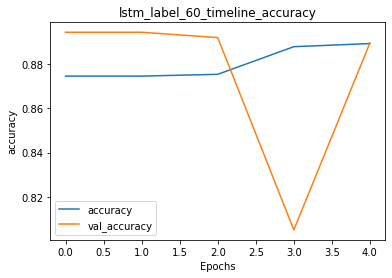

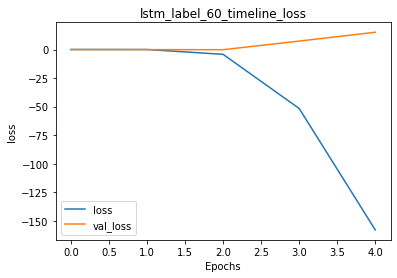

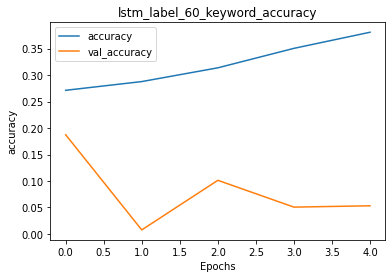

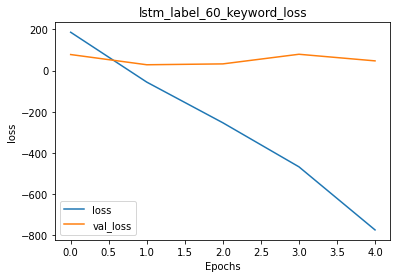

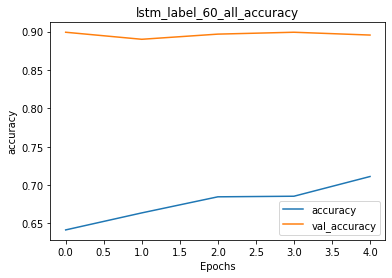

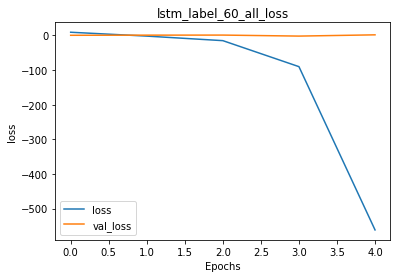

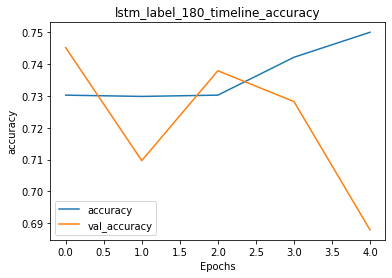

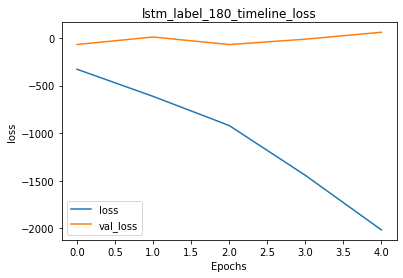

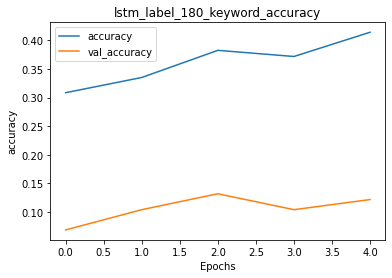

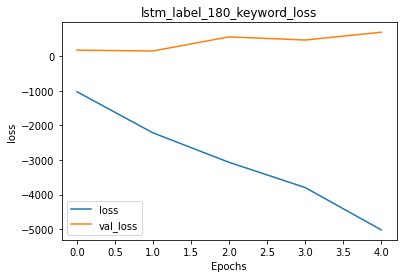

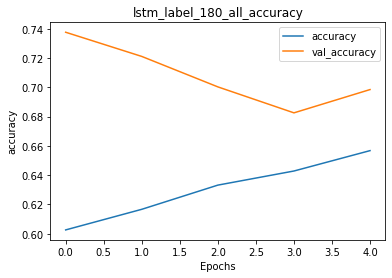

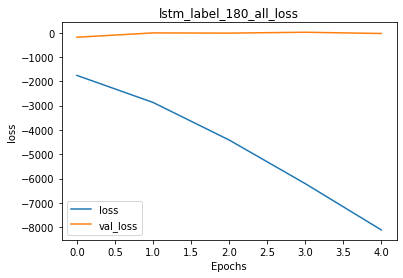

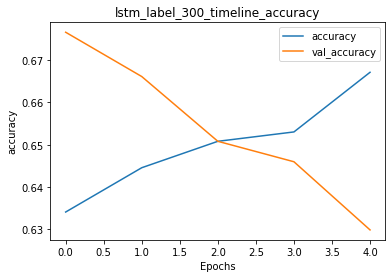

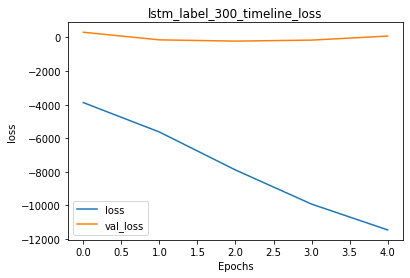

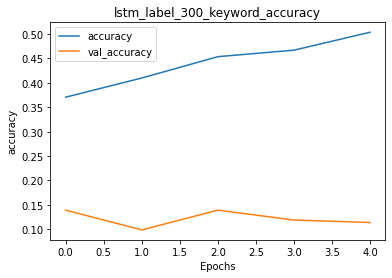

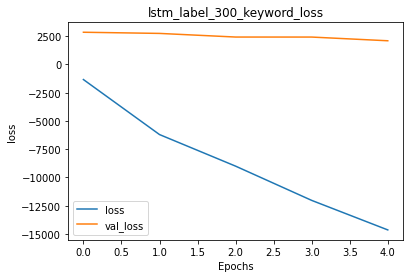

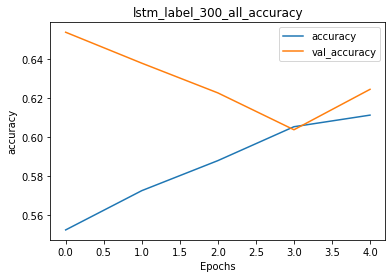

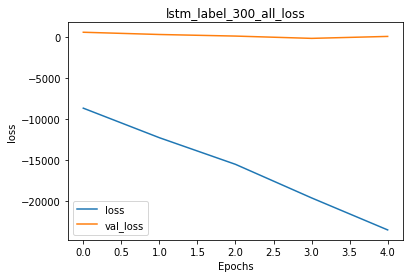

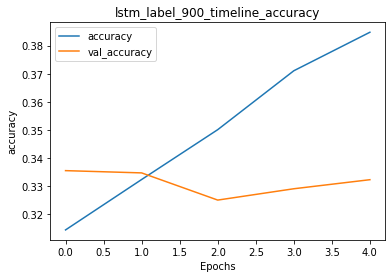

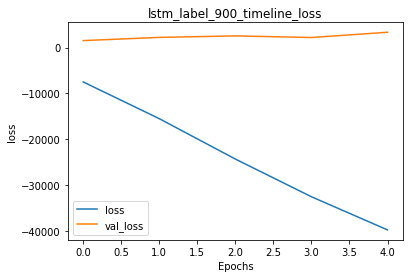

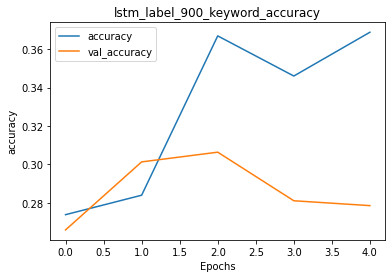

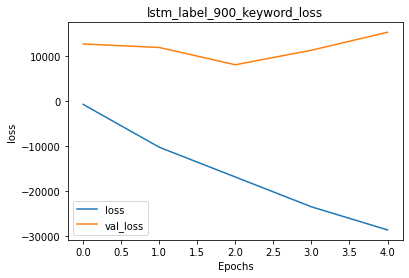

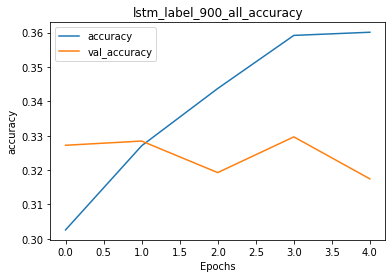

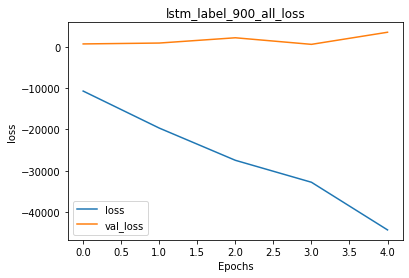

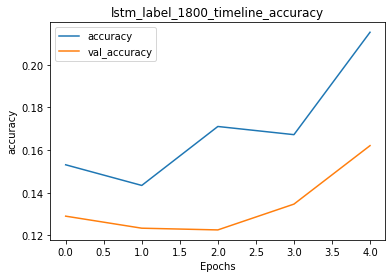

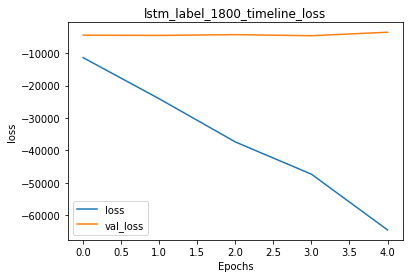

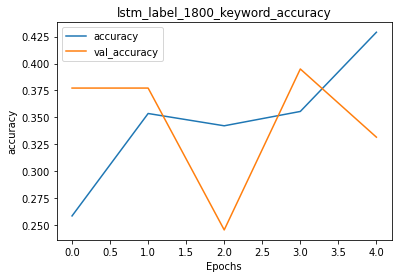

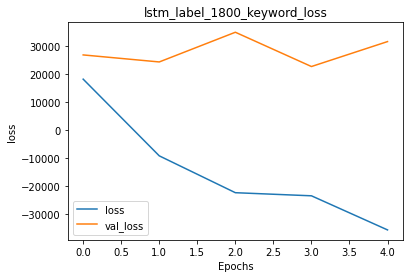

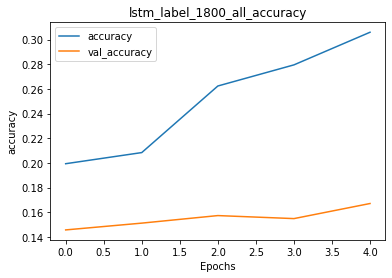

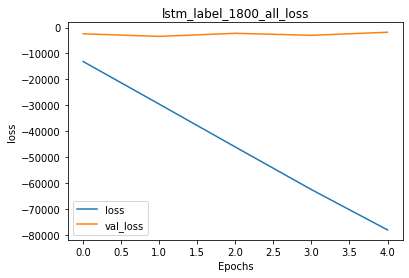

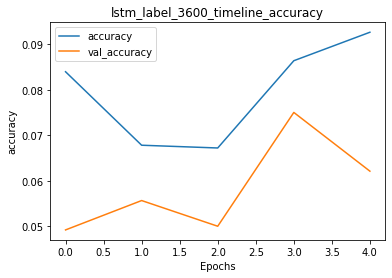

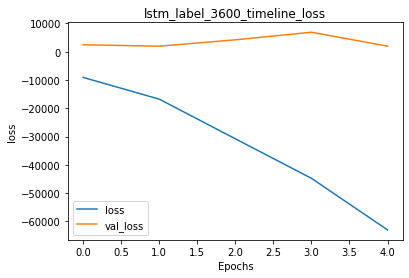

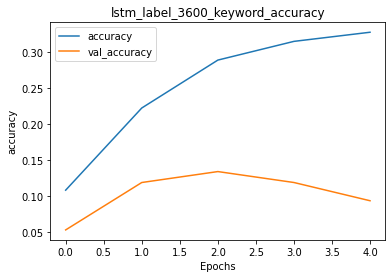

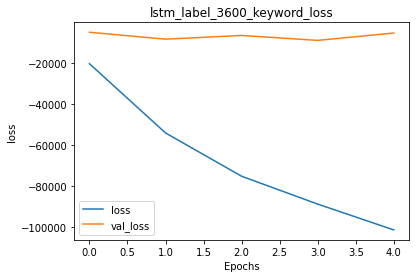

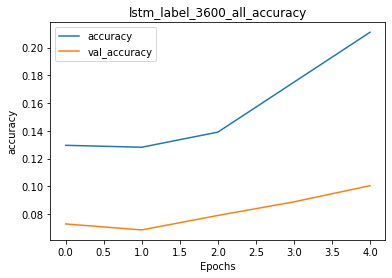

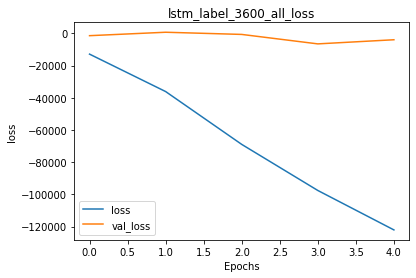

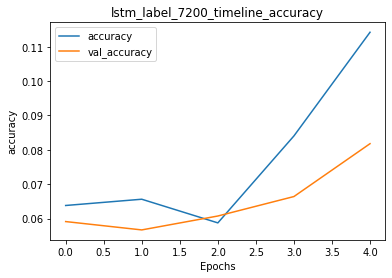

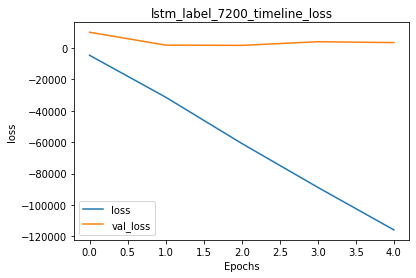

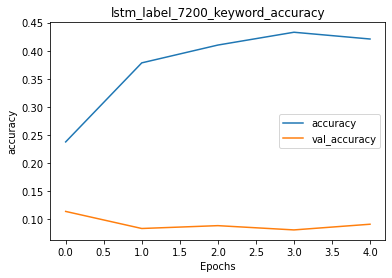

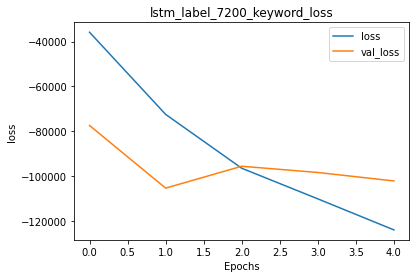

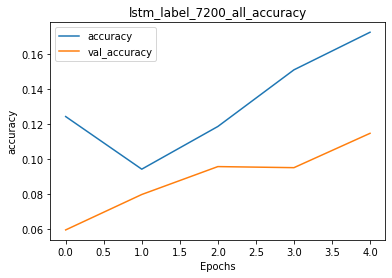

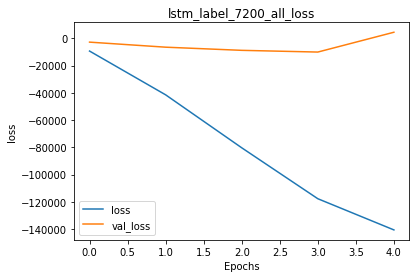

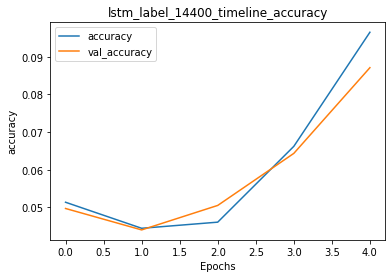

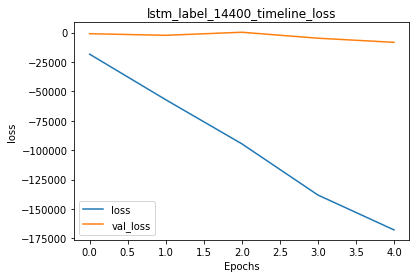

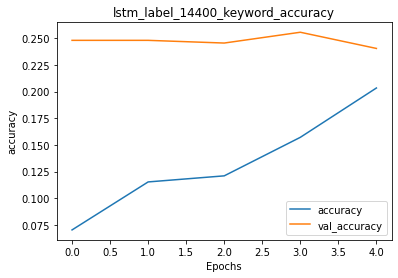

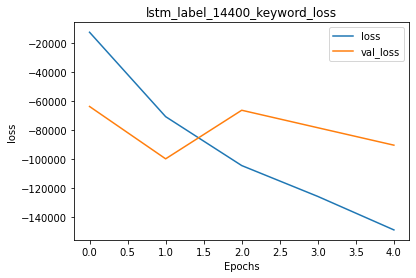

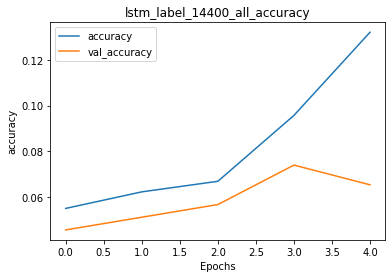

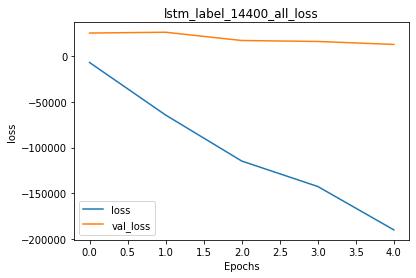

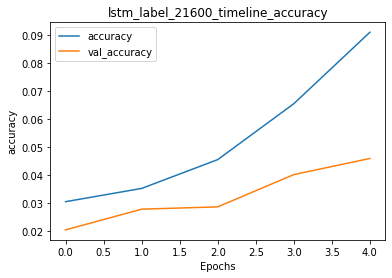

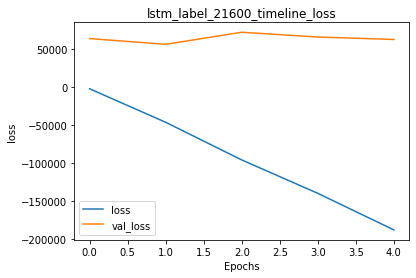

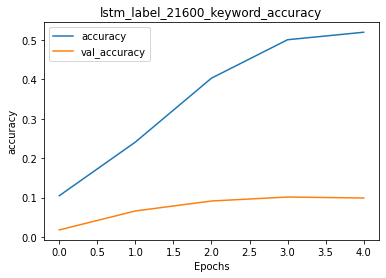

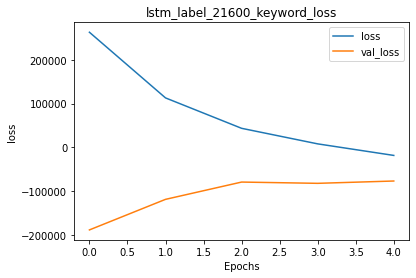

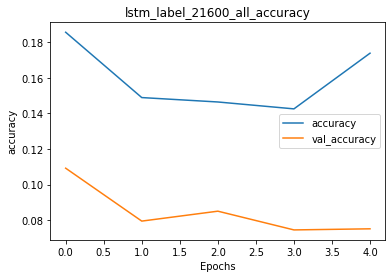

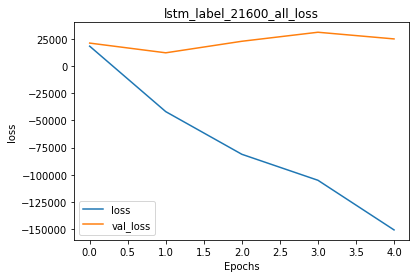

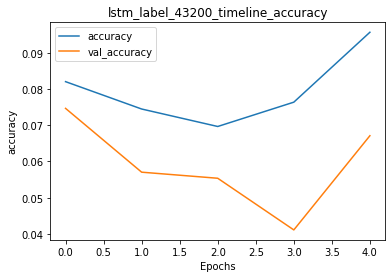

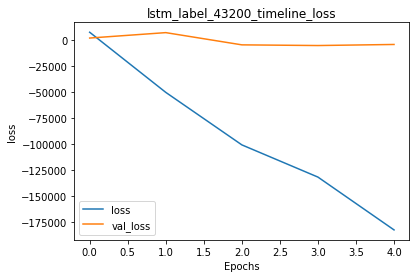

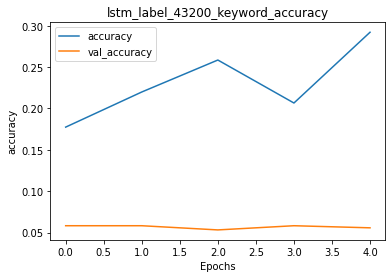

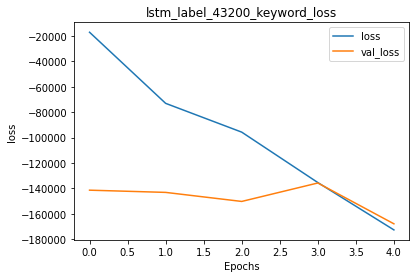

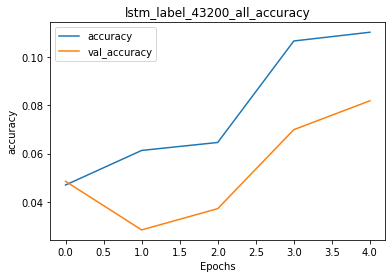

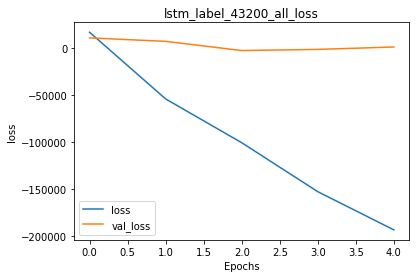

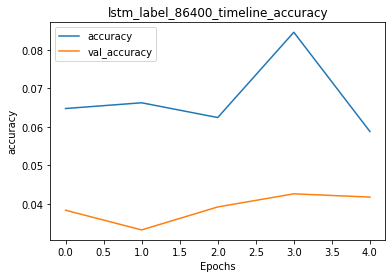

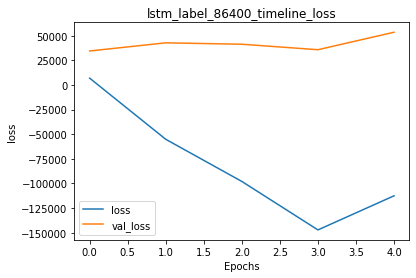

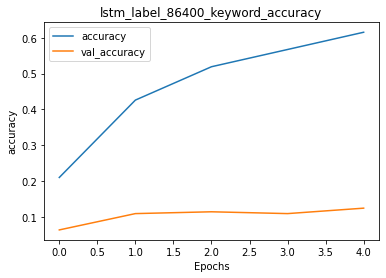

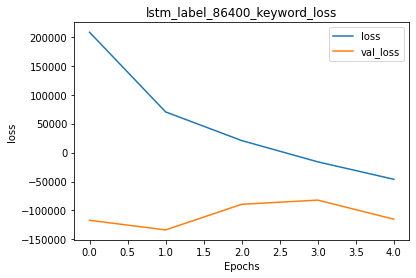

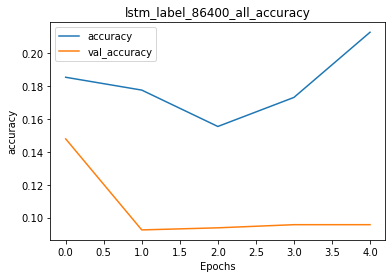

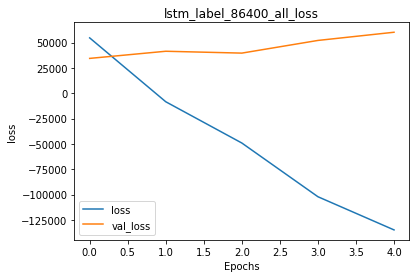

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string, label):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title(label + '_' + string)
  plt.savefig(path + 'figures/' + label + '_' + string + '.png')
  plt.show()
  
for his in history:
  plot_graphs(history[his], "accuracy", his)
  plot_graphs(history[his], "loss", his)

#Results

Our project uses the Long Short-Term Memory model to train.
Our data include over 6000 tweets from selected timelines and tweets retrieved by certain keywords, and the BTC/USDT market prices from Binance. These tweets are from Feb to June 2021. We label each tweet with their correlating market price change in percentage: '1' or '-1' if the change is more than 5 percent, and '0' if the change does not exceed 5%.


1. The model can reach around 60% accuracy within the 5-minute timeframes with tweets from selected timelines.

2. In shorter timeframes, the accuracy with tweets from timelines is higher than with tweets from keywords While in longer timeframes, tweets from keywords might have a higher accuracy, though it is still low.

3. Ways to improve:
  1. Refine our method of selecting tweets: choose the tweets with more specific criteria so they reflect the market fluctuations.
  2. Collect more data: ~6000 tweets might not be enough for the 4.5-month timespan.



###Pivot20%

In [ ]:
lstm_change_60_timeline
Epoch 1/5
155/155 - 32s - loss: 0.0202 - accuracy: 0.8183 - val_loss: -6.2338e-02 - val_accuracy: 0.9541
Epoch 2/5
155/155 - 28s - loss: -2.3652e-02 - accuracy: 0.8183 - val_loss: -1.9363e-01 - val_accuracy: 0.9541
Epoch 3/5
155/155 - 28s - loss: -1.1252e+00 - accuracy: 0.8157 - val_loss: -1.1322e+00 - val_accuracy: 0.9541
Epoch 4/5
155/155 - 28s - loss: -6.0540e+00 - accuracy: 0.8169 - val_loss: -2.6157e+00 - val_accuracy: 0.9541
Epoch 5/5
155/155 - 28s - loss: -1.4617e+01 - accuracy: 0.8167 - val_loss: -5.1745e+00 - val_accuracy: 0.9541
lstm_change_60_keyword
Epoch 1/5
50/50 - 14s - loss: 25.2012 - accuracy: 0.0000e+00 - val_loss: 16.6795 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: -7.2934e+00 - accuracy: 0.0000e+00 - val_loss: 35.7493 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -4.6785e+01 - accuracy: 0.0000e+00 - val_loss: 70.5578 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -8.9043e+01 - accuracy: 0.0000e+00 - val_loss: 60.6171 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -1.3240e+02 - accuracy: 0.0000e+00 - val_loss: 136.0572 - val_accuracy: 0.0000e+00
lstm_change_60_all
Epoch 1/5
205/205 - 44s - loss: -7.7966e+00 - accuracy: 0.7805 - val_loss: 244.3508 - val_accuracy: 0.0000e+00
Epoch 2/5
205/205 - 40s - loss: -2.3428e+01 - accuracy: 0.7809 - val_loss: 324.3039 - val_accuracy: 0.0000e+00
Epoch 3/5
205/205 - 40s - loss: -4.7685e+01 - accuracy: 0.7809 - val_loss: 198.1267 - val_accuracy: 0.0000e+00
Epoch 4/5
205/205 - 40s - loss: -9.1783e+01 - accuracy: 0.7804 - val_loss: 346.9724 - val_accuracy: 0.0000e+00
Epoch 5/5
205/205 - 40s - loss: -1.6445e+02 - accuracy: 0.7787 - val_loss: 867.5727 - val_accuracy: 0.0000e+00
lstm_label_60_timeline
Epoch 1/5
155/155 - 31s - loss: -9.7411e+01 - accuracy: 0.9502 - val_loss: -9.6063e+01 - val_accuracy: 0.9533
Epoch 2/5
155/155 - 28s - loss: -1.6455e+02 - accuracy: 0.9544 - val_loss: -9.0351e+01 - val_accuracy: 0.9533
Epoch 3/5
155/155 - 28s - loss: -2.0668e+02 - accuracy: 0.9575 - val_loss: -1.0567e+02 - val_accuracy: 0.9428
Epoch 4/5
155/155 - 28s - loss: -2.4874e+02 - accuracy: 0.9593 - val_loss: -1.6058e+02 - val_accuracy: 0.9428
Epoch 5/5
155/155 - 28s - loss: -2.8484e+02 - accuracy: 0.9631 - val_loss: -1.4480e+02 - val_accuracy: 0.9307
lstm_label_60_keyword
Epoch 1/5
50/50 - 14s - loss: -1.7127e+03 - accuracy: 0.6812 - val_loss: 4978.9951 - val_accuracy: 0.5063
Epoch 2/5
50/50 - 10s - loss: -2.3352e+03 - accuracy: 0.6774 - val_loss: 5324.2202 - val_accuracy: 0.5089
Epoch 3/5
50/50 - 10s - loss: -2.6362e+03 - accuracy: 0.6762 - val_loss: 3772.5266 - val_accuracy: 0.5038
Epoch 4/5
50/50 - 10s - loss: -3.0228e+03 - accuracy: 0.6926 - val_loss: 5586.1943 - val_accuracy: 0.4987
Epoch 5/5
50/50 - 10s - loss: -3.4109e+03 - accuracy: 0.7047 - val_loss: 6148.9912 - val_accuracy: 0.5089
lstm_label_60_all
Epoch 1/5
205/205 - 43s - loss: -6.9338e+02 - accuracy: 0.9388 - val_loss: 2133.1458 - val_accuracy: 0.6300
Epoch 2/5
205/205 - 40s - loss: -8.5602e+02 - accuracy: 0.9416 - val_loss: 2605.5562 - val_accuracy: 0.6318
Epoch 3/5
205/205 - 40s - loss: -1.0299e+03 - accuracy: 0.9440 - val_loss: 3146.9070 - val_accuracy: 0.6336
Epoch 4/5
205/205 - 40s - loss: -1.2128e+03 - accuracy: 0.9442 - val_loss: 3077.8306 - val_accuracy: 0.6336
Epoch 5/5
205/205 - 40s - loss: -1.4652e+03 - accuracy: 0.9479 - val_loss: 2667.0532 - val_accuracy: 0.6275
lstm_change_180_timeline
Epoch 1/5
155/155 - 31s - loss: -3.6829e+02 - accuracy: 0.6740 - val_loss: 288.5577 - val_accuracy: 0.7194
Epoch 2/5
155/155 - 28s - loss: -6.9171e+02 - accuracy: 0.6720 - val_loss: 239.0367 - val_accuracy: 0.7169
Epoch 3/5
155/155 - 28s - loss: -1.0981e+03 - accuracy: 0.6706 - val_loss: 151.8534 - val_accuracy: 0.7145
Epoch 4/5
155/155 - 28s - loss: -1.5227e+03 - accuracy: 0.6694 - val_loss: 469.1895 - val_accuracy: 0.7024
Epoch 5/5
155/155 - 28s - loss: -1.9084e+03 - accuracy: 0.6645 - val_loss: 303.3700 - val_accuracy: 0.7000
lstm_change_180_keyword
Epoch 1/5
50/50 - 14s - loss: -3.1768e+03 - accuracy: 0.0000e+00 - val_loss: 394.2127 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: -4.3085e+03 - accuracy: 0.0000e+00 - val_loss: 436.7705 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -4.8883e+03 - accuracy: 0.0000e+00 - val_loss: 10.2748 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -5.2741e+03 - accuracy: 0.0000e+00 - val_loss: 714.1557 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -5.9304e+03 - accuracy: 0.0000e+00 - val_loss: 466.9267 - val_accuracy: 0.0000e+00
lstm_change_180_all
Epoch 1/5
205/205 - 43s - loss: -1.5549e+03 - accuracy: 0.6476 - val_loss: 4554.3403 - val_accuracy: 0.0000e+00
Epoch 2/5
205/205 - 39s - loss: -2.1660e+03 - accuracy: 0.6448 - val_loss: 2505.0483 - val_accuracy: 0.0000e+00
Epoch 3/5
205/205 - 40s - loss: -2.7556e+03 - accuracy: 0.6433 - val_loss: 4571.7407 - val_accuracy: 0.0000e+00
Epoch 4/5
205/205 - 39s - loss: -3.4580e+03 - accuracy: 0.6427 - val_loss: 3650.1013 - val_accuracy: 0.0000e+00
Epoch 5/5
205/205 - 40s - loss: -4.1744e+03 - accuracy: 0.6427 - val_loss: 4279.9028 - val_accuracy: 0.0000e+00
lstm_label_180_timeline
Epoch 1/5
155/155 - 31s - loss: -3.8543e+03 - accuracy: 0.8637 - val_loss: -3.5687e+02 - val_accuracy: 0.8653
Epoch 2/5
155/155 - 28s - loss: -4.9129e+03 - accuracy: 0.8665 - val_loss: -4.6416e+02 - val_accuracy: 0.8113
Epoch 3/5
155/155 - 28s - loss: -5.9657e+03 - accuracy: 0.8790 - val_loss: -4.9073e+02 - val_accuracy: 0.8258
Epoch 4/5
155/155 - 28s - loss: -6.5918e+03 - accuracy: 0.8770 - val_loss: -2.8500e+02 - val_accuracy: 0.8218
Epoch 5/5
155/155 - 28s - loss: -7.0519e+03 - accuracy: 0.8849 - val_loss: -5.9097e+02 - val_accuracy: 0.8161
lstm_label_180_keyword
Epoch 1/5
50/50 - 13s - loss: -1.6965e+04 - accuracy: 0.6812 - val_loss: 6218.3418 - val_accuracy: 0.4987
Epoch 2/5
50/50 - 10s - loss: -2.0742e+04 - accuracy: 0.6673 - val_loss: -5.7377e+03 - val_accuracy: 0.4886
Epoch 3/5
50/50 - 10s - loss: -2.1554e+04 - accuracy: 0.6844 - val_loss: -1.4876e+03 - val_accuracy: 0.4405
Epoch 4/5
50/50 - 10s - loss: -2.3406e+04 - accuracy: 0.7079 - val_loss: -2.3937e+03 - val_accuracy: 0.4481
Epoch 5/5
50/50 - 10s - loss: -2.5137e+04 - accuracy: 0.7079 - val_loss: 3117.7839 - val_accuracy: 0.4557
lstm_label_180_all
Epoch 1/5
205/205 - 44s - loss: -8.7320e+03 - accuracy: 0.8610 - val_loss: 2130.0432 - val_accuracy: 0.6336
Epoch 2/5
205/205 - 39s - loss: -1.0331e+04 - accuracy: 0.8682 - val_loss: 1165.6879 - val_accuracy: 0.5810
Epoch 3/5
205/205 - 40s - loss: -1.1668e+04 - accuracy: 0.8698 - val_loss: 1179.5867 - val_accuracy: 0.6190
Epoch 4/5
205/205 - 40s - loss: -1.3042e+04 - accuracy: 0.8769 - val_loss: 1845.9833 - val_accuracy: 0.6098
Epoch 5/5
205/205 - 40s - loss: -1.4003e+04 - accuracy: 0.8769 - val_loss: 1135.0614 - val_accuracy: 0.6165
lstm_change_300_timeline
Epoch 1/5
155/155 - 32s - loss: -6.7349e+03 - accuracy: 0.5756 - val_loss: 1224.9343 - val_accuracy: 0.6234
Epoch 2/5
155/155 - 28s - loss: -8.7910e+03 - accuracy: 0.5748 - val_loss: 1272.6471 - val_accuracy: 0.6444
Epoch 3/5
155/155 - 28s - loss: -1.0573e+04 - accuracy: 0.5722 - val_loss: 716.3501 - val_accuracy: 0.6202
Epoch 4/5
155/155 - 28s - loss: -1.1697e+04 - accuracy: 0.5724 - val_loss: 931.6212 - val_accuracy: 0.6000
Epoch 5/5
155/155 - 28s - loss: -1.2438e+04 - accuracy: 0.5734 - val_loss: 656.5819 - val_accuracy: 0.6185
lstm_change_300_keyword
Epoch 1/5
50/50 - 13s - loss: -9.9243e+03 - accuracy: 0.0000e+00 - val_loss: -6.9726e+03 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: -1.4225e+04 - accuracy: 0.0000e+00 - val_loss: -5.5340e+03 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -1.6463e+04 - accuracy: 0.0000e+00 - val_loss: -2.7437e+03 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -1.8279e+04 - accuracy: 0.0000e+00 - val_loss: -4.5812e+03 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -2.0647e+04 - accuracy: 0.0000e+00 - val_loss: -5.5033e+03 - val_accuracy: 0.0000e+00
lstm_change_300_all
Epoch 1/5
205/205 - 43s - loss: -1.0548e+04 - accuracy: 0.5566 - val_loss: 13984.0049 - val_accuracy: 0.0000e+00
Epoch 2/5
205/205 - 40s - loss: -1.3350e+04 - accuracy: 0.5567 - val_loss: 21635.8906 - val_accuracy: 0.0000e+00
Epoch 3/5
205/205 - 40s - loss: -1.5551e+04 - accuracy: 0.5563 - val_loss: 19571.2344 - val_accuracy: 0.0000e+00
Epoch 4/5
205/205 - 40s - loss: -1.7983e+04 - accuracy: 0.5580 - val_loss: 21691.5703 - val_accuracy: 0.0000e+00
Epoch 5/5
205/205 - 40s - loss: -1.9990e+04 - accuracy: 0.5548 - val_loss: 19561.6309 - val_accuracy: 0.0000e+00
lstm_label_300_timeline
Epoch 1/5
155/155 - 31s - loss: -2.4230e+04 - accuracy: 0.7925 - val_loss: -2.5200e+03 - val_accuracy: 0.7839
Epoch 2/5
155/155 - 28s - loss: -2.8620e+04 - accuracy: 0.8026 - val_loss: -4.5402e+03 - val_accuracy: 0.7653
Epoch 3/5
155/155 - 28s - loss: -3.0586e+04 - accuracy: 0.8105 - val_loss: -3.8864e+03 - val_accuracy: 0.7589
Epoch 4/5
155/155 - 28s - loss: -3.3518e+04 - accuracy: 0.8240 - val_loss: -2.9287e+03 - val_accuracy: 0.7476
Epoch 5/5
155/155 - 28s - loss: -3.6456e+04 - accuracy: 0.8288 - val_loss: -2.5764e+03 - val_accuracy: 0.7992
lstm_label_300_keyword
Epoch 1/5
50/50 - 14s - loss: -3.5936e+04 - accuracy: 0.7300 - val_loss: -2.9206e+03 - val_accuracy: 0.0228
Epoch 2/5
50/50 - 10s - loss: -3.9912e+04 - accuracy: 0.7351 - val_loss: -2.5615e+03 - val_accuracy: 0.0380
Epoch 3/5
50/50 - 10s - loss: -4.4803e+04 - accuracy: 0.7478 - val_loss: -1.5465e+04 - val_accuracy: 0.0405
Epoch 4/5
50/50 - 10s - loss: -4.7798e+04 - accuracy: 0.7617 - val_loss: -2.1787e+04 - val_accuracy: 0.0506
Epoch 5/5
50/50 - 10s - loss: -5.0013e+04 - accuracy: 0.7839 - val_loss: -1.5995e+04 - val_accuracy: 0.1089
lstm_label_300_all
Epoch 1/5
205/205 - 43s - loss: -3.8188e+04 - accuracy: 0.7894 - val_loss: 13866.0469 - val_accuracy: 0.5719
Epoch 2/5
205/205 - 40s - loss: -4.3736e+04 - accuracy: 0.8033 - val_loss: 14564.3936 - val_accuracy: 0.5731
Epoch 3/5
205/205 - 40s - loss: -4.7515e+04 - accuracy: 0.8111 - val_loss: 13648.1133 - val_accuracy: 0.5737
Epoch 4/5
205/205 - 40s - loss: -5.0600e+04 - accuracy: 0.8183 - val_loss: 14479.5537 - val_accuracy: 0.5523
Epoch 5/5
205/205 - 40s - loss: -5.3590e+04 - accuracy: 0.8189 - val_loss: 17819.1055 - val_accuracy: 0.5468
lstm_change_900_timeline
Epoch 1/5
155/155 - 34s - loss: -1.6007e+04 - accuracy: 0.2339 - val_loss: 7204.2305 - val_accuracy: 0.2581
Epoch 2/5
155/155 - 30s - loss: -2.7224e+04 - accuracy: 0.2335 - val_loss: 3801.8218 - val_accuracy: 0.2435
Epoch 3/5
155/155 - 30s - loss: -3.9863e+04 - accuracy: 0.2325 - val_loss: 2569.1448 - val_accuracy: 0.2290
Epoch 4/5
155/155 - 30s - loss: -4.9976e+04 - accuracy: 0.2287 - val_loss: 4489.1133 - val_accuracy: 0.2435
Epoch 5/5
155/155 - 30s - loss: -6.0931e+04 - accuracy: 0.2305 - val_loss: 1928.9452 - val_accuracy: 0.2355
lstm_change_900_keyword
Epoch 1/5
50/50 - 13s - loss: 26462.4355 - accuracy: 0.0000e+00 - val_loss: 4413.1919 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: 1377.2788 - accuracy: 0.0000e+00 - val_loss: 3067.1526 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -8.8301e+03 - accuracy: 0.0000e+00 - val_loss: 3751.9507 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -1.4656e+04 - accuracy: 0.0000e+00 - val_loss: 2837.1108 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -2.0774e+04 - accuracy: 0.0000e+00 - val_loss: 3207.8882 - val_accuracy: 0.0000e+00
lstm_change_900_all
Epoch 1/5
205/205 - 43s - loss: -1.6335e+04 - accuracy: 0.2261 - val_loss: 73994.6875 - val_accuracy: 0.0000e+00
Epoch 2/5
205/205 - 40s - loss: -2.9540e+04 - accuracy: 0.2233 - val_loss: 66882.2344 - val_accuracy: 0.0000e+00
Epoch 3/5
205/205 - 40s - loss: -4.3237e+04 - accuracy: 0.2210 - val_loss: 63925.3242 - val_accuracy: 0.0000e+00
Epoch 4/5
205/205 - 40s - loss: -5.0795e+04 - accuracy: 0.2221 - val_loss: 69534.5625 - val_accuracy: 0.0000e+00
Epoch 5/5
205/205 - 40s - loss: -6.0050e+04 - accuracy: 0.2221 - val_loss: 65201.5117 - val_accuracy: 0.0000e+00
lstm_label_900_timeline
Epoch 1/5
155/155 - 35s - loss: -8.6032e+04 - accuracy: 0.5308 - val_loss: 1906.3149 - val_accuracy: 0.5000
Epoch 2/5
155/155 - 30s - loss: -1.0539e+05 - accuracy: 0.5501 - val_loss: -2.1298e+03 - val_accuracy: 0.4968
Epoch 3/5
155/155 - 30s - loss: -1.1939e+05 - accuracy: 0.5543 - val_loss: -3.4964e+03 - val_accuracy: 0.4895
Epoch 4/5
155/155 - 30s - loss: -1.3028e+05 - accuracy: 0.5668 - val_loss: -6.4613e+02 - val_accuracy: 0.4782
Epoch 5/5
155/155 - 30s - loss: -1.4318e+05 - accuracy: 0.5880 - val_loss: 672.2036 - val_accuracy: 0.4839
lstm_label_900_keyword
Epoch 1/5
50/50 - 14s - loss: -3.1109e+04 - accuracy: 0.3802 - val_loss: -3.4051e+03 - val_accuracy: 0.4658
Epoch 2/5
50/50 - 10s - loss: -5.5932e+04 - accuracy: 0.4018 - val_loss: -4.1376e+03 - val_accuracy: 0.4152
Epoch 3/5
50/50 - 10s - loss: -8.0873e+04 - accuracy: 0.4506 - val_loss: -8.1834e+03 - val_accuracy: 0.4101
Epoch 4/5
50/50 - 10s - loss: -9.5515e+04 - accuracy: 0.4525 - val_loss: -8.3582e+03 - val_accuracy: 0.4430
Epoch 5/5
50/50 - 10s - loss: -1.0359e+05 - accuracy: 0.5063 - val_loss: -9.2861e+03 - val_accuracy: 0.4633
lstm_label_900_all
Epoch 1/5
205/205 - 44s - loss: -1.0644e+05 - accuracy: 0.5340 - val_loss: 48357.5938 - val_accuracy: 0.3823
Epoch 2/5
205/205 - 40s - loss: -1.3260e+05 - accuracy: 0.5481 - val_loss: 44896.0781 - val_accuracy: 0.3841
Epoch 3/5
205/205 - 41s - loss: -1.5036e+05 - accuracy: 0.5663 - val_loss: 48464.9609 - val_accuracy: 0.3872
Epoch 4/5
205/205 - 41s - loss: -1.6536e+05 - accuracy: 0.5822 - val_loss: 59980.6367 - val_accuracy: 0.3939
Epoch 5/5
205/205 - 41s - loss: -1.7586e+05 - accuracy: 0.5778 - val_loss: 59266.9648 - val_accuracy: 0.3804
lstm_change_1800_timeline
Epoch 1/5
155/155 - 35s - loss: -6.1906e+04 - accuracy: 0.0184 - val_loss: -2.1102e+04 - val_accuracy: 0.0185
Epoch 2/5
155/155 - 30s - loss: -1.0045e+05 - accuracy: 0.0182 - val_loss: -1.6520e+04 - val_accuracy: 0.0210
Epoch 3/5
155/155 - 31s - loss: -1.3106e+05 - accuracy: 0.0184 - val_loss: -1.9318e+04 - val_accuracy: 0.0234
Epoch 4/5
155/155 - 30s - loss: -1.4924e+05 - accuracy: 0.0180 - val_loss: -2.0639e+04 - val_accuracy: 0.0218
Epoch 5/5
155/155 - 31s - loss: -1.7381e+05 - accuracy: 0.0186 - val_loss: -2.0105e+04 - val_accuracy: 0.0218
lstm_change_1800_keyword
Epoch 1/5
50/50 - 14s - loss: 52077.0234 - accuracy: 0.0000e+00 - val_loss: 5116.5674 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: 1999.4797 - accuracy: 0.0000e+00 - val_loss: 2733.4277 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -1.5459e+04 - accuracy: 0.0000e+00 - val_loss: 3383.1443 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -2.7425e+04 - accuracy: 0.0000e+00 - val_loss: 4858.0625 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -3.6284e+04 - accuracy: 0.0000e+00 - val_loss: 4998.0903 - val_accuracy: 0.0000e+00
lstm_change_1800_all
Epoch 1/5
205/205 - 44s - loss: -7.0404e+04 - accuracy: 0.0181 - val_loss: 134290.0781 - val_accuracy: 0.0000e+00
Epoch 2/5
205/205 - 41s - loss: -1.0711e+05 - accuracy: 0.0187 - val_loss: 128223.4688 - val_accuracy: 0.0000e+00
Epoch 3/5
205/205 - 41s - loss: -1.4714e+05 - accuracy: 0.0184 - val_loss: 179556.8594 - val_accuracy: 0.0000e+00
Epoch 4/5
205/205 - 41s - loss: -1.7594e+05 - accuracy: 0.0187 - val_loss: 142390.2812 - val_accuracy: 0.0000e+00
Epoch 5/5
205/205 - 41s - loss: -2.0416e+05 - accuracy: 0.0185 - val_loss: 194596.7188 - val_accuracy: 0.0000e+00
lstm_label_1800_timeline
Epoch 1/5
155/155 - 37s - loss: -1.8883e+05 - accuracy: 0.3762 - val_loss: -5.5383e+03 - val_accuracy: 0.3403
Epoch 2/5
155/155 - 31s - loss: -2.3056e+05 - accuracy: 0.4019 - val_loss: -1.0871e+03 - val_accuracy: 0.3331
Epoch 3/5
155/155 - 31s - loss: -2.6691e+05 - accuracy: 0.4130 - val_loss: 2816.8218 - val_accuracy: 0.3403
Epoch 4/5
155/155 - 31s - loss: -2.9695e+05 - accuracy: 0.4295 - val_loss: -4.7662e+02 - val_accuracy: 0.3427
Epoch 5/5
155/155 - 31s - loss: -3.2038e+05 - accuracy: 0.4374 - val_loss: -5.4665e+03 - val_accuracy: 0.3419
lstm_label_1800_keyword
Epoch 1/5
50/50 - 14s - loss: 4536.7495 - accuracy: 0.3333 - val_loss: 23993.7363 - val_accuracy: 0.3975
Epoch 2/5
50/50 - 10s - loss: -7.8020e+04 - accuracy: 0.3707 - val_loss: 10725.6611 - val_accuracy: 0.4025
Epoch 3/5
50/50 - 10s - loss: -1.1039e+05 - accuracy: 0.4316 - val_loss: 5581.9209 - val_accuracy: 0.3772
Epoch 4/5
50/50 - 10s - loss: -1.3694e+05 - accuracy: 0.4208 - val_loss: 12525.9961 - val_accuracy: 0.3975
Epoch 5/5
50/50 - 10s - loss: -1.5361e+05 - accuracy: 0.4474 - val_loss: 18843.7715 - val_accuracy: 0.3772
lstm_label_1800_all
Epoch 1/5
205/205 - 45s - loss: -2.2149e+05 - accuracy: 0.3868 - val_loss: 148116.5938 - val_accuracy: 0.3329
Epoch 2/5
205/205 - 41s - loss: -2.8653e+05 - accuracy: 0.4093 - val_loss: 151500.7031 - val_accuracy: 0.3384
Epoch 3/5
205/205 - 41s - loss: -3.1927e+05 - accuracy: 0.4255 - val_loss: 130680.0234 - val_accuracy: 0.3568
Epoch 4/5
205/205 - 41s - loss: -3.5344e+05 - accuracy: 0.4480 - val_loss: 117919.6172 - val_accuracy: 0.3611
Epoch 5/5
205/205 - 41s - loss: -3.8694e+05 - accuracy: 0.4688 - val_loss: 135792.7500 - val_accuracy: 0.3513
lstm_change_3600_timeline
Epoch 1/5
155/155 - 35s - loss: -8.9740e+04 - accuracy: 0.0010 - val_loss: -1.5969e+04 - val_accuracy: 0.0000e+00
Epoch 2/5
155/155 - 31s - loss: -1.8222e+05 - accuracy: 0.0010 - val_loss: -1.9536e+04 - val_accuracy: 0.0000e+00
Epoch 3/5
155/155 - 31s - loss: -2.4130e+05 - accuracy: 0.0010 - val_loss: -2.9674e+04 - val_accuracy: 0.0000e+00
Epoch 4/5
155/155 - 31s - loss: -3.0888e+05 - accuracy: 0.0010 - val_loss: -4.2942e+04 - val_accuracy: 0.0000e+00
Epoch 5/5
155/155 - 31s - loss: -3.6665e+05 - accuracy: 0.0010 - val_loss: -3.9079e+04 - val_accuracy: 0.0000e+00
lstm_change_3600_keyword
Epoch 1/5
50/50 - 14s - loss: 95899.2656 - accuracy: 0.0000e+00 - val_loss: -1.3894e+04 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: -6.7924e+04 - accuracy: 0.0000e+00 - val_loss: -1.0181e+04 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -1.1334e+05 - accuracy: 0.0000e+00 - val_loss: -1.6657e+04 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -1.4516e+05 - accuracy: 0.0000e+00 - val_loss: -1.1698e+04 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -1.6457e+05 - accuracy: 0.0000e+00 - val_loss: -2.1994e+04 - val_accuracy: 0.0000e+00
lstm_change_3600_all
Epoch 1/5
205/205 - 44s - loss: -7.8101e+04 - accuracy: 4.5935e-04 - val_loss: 450974.9688 - val_accuracy: 0.0000e+00
Epoch 2/5
205/205 - 41s - loss: -1.5935e+05 - accuracy: 7.6558e-04 - val_loss: 358805.3750 - val_accuracy: 0.0000e+00
Epoch 3/5
205/205 - 41s - loss: -2.3627e+05 - accuracy: 7.6558e-04 - val_loss: 324897.6562 - val_accuracy: 0.0000e+00
Epoch 4/5
205/205 - 41s - loss: -2.8240e+05 - accuracy: 7.6558e-04 - val_loss: 303920.8125 - val_accuracy: 0.0000e+00
Epoch 5/5
205/205 - 41s - loss: -3.6006e+05 - accuracy: 6.1246e-04 - val_loss: 334715.6562 - val_accuracy: 0.0000e+00
lstm_label_3600_timeline
Epoch 1/5
155/155 - 35s - loss: -2.5141e+05 - accuracy: 0.2393 - val_loss: -8.9791e+03 - val_accuracy: 0.2050
Epoch 2/5
155/155 - 31s - loss: -3.7032e+05 - accuracy: 0.2746 - val_loss: -1.3476e+03 - val_accuracy: 0.2179
Epoch 3/5
155/155 - 31s - loss: -4.4246e+05 - accuracy: 0.3007 - val_loss: -7.7086e+03 - val_accuracy: 0.2211
Epoch 4/5
155/155 - 31s - loss: -5.0759e+05 - accuracy: 0.3191 - val_loss: 3740.2979 - val_accuracy: 0.2074
Epoch 5/5
155/155 - 31s - loss: -5.5821e+05 - accuracy: 0.3296 - val_loss: 9939.1367 - val_accuracy: 0.2276
lstm_label_3600_keyword
Epoch 1/5
50/50 - 14s - loss: -1.8613e+05 - accuracy: 0.3213 - val_loss: 120617.2344 - val_accuracy: 0.3342
Epoch 2/5
50/50 - 10s - loss: -3.0855e+05 - accuracy: 0.3644 - val_loss: 103260.1094 - val_accuracy: 0.3671
Epoch 3/5
50/50 - 10s - loss: -3.7842e+05 - accuracy: 0.4113 - val_loss: 83140.0391 - val_accuracy: 0.3570
Epoch 4/5
50/50 - 10s - loss: -4.1303e+05 - accuracy: 0.4271 - val_loss: 92120.7969 - val_accuracy: 0.3696
Epoch 5/5
50/50 - 10s - loss: -4.3411e+05 - accuracy: 0.4493 - val_loss: 121892.1094 - val_accuracy: 0.3544
lstm_label_3600_all
Epoch 1/5
205/205 - 46s - loss: -3.3360e+05 - accuracy: 0.2857 - val_loss: 170008.4375 - val_accuracy: 0.1684
Epoch 2/5
205/205 - 41s - loss: -4.2052e+05 - accuracy: 0.2782 - val_loss: 241189.4062 - val_accuracy: 0.1721
Epoch 3/5
205/205 - 41s - loss: -4.9942e+05 - accuracy: 0.3122 - val_loss: 287915.0625 - val_accuracy: 0.1629
Epoch 4/5
205/205 - 41s - loss: -5.7432e+05 - accuracy: 0.3428 - val_loss: 278063.8125 - val_accuracy: 0.1892
Epoch 5/5
205/205 - 41s - loss: -6.3200e+05 - accuracy: 0.3632 - val_loss: 273472.8750 - val_accuracy: 0.1898
lstm_change_7200_timeline
Epoch 1/5
155/155 - 35s - loss: -1.1574e+05 - accuracy: 2.0251e-04 - val_loss: 132240.2969 - val_accuracy: 0.0000e+00
Epoch 2/5
155/155 - 31s - loss: -2.8786e+05 - accuracy: 2.0251e-04 - val_loss: 105858.6406 - val_accuracy: 0.0000e+00
Epoch 3/5
155/155 - 31s - loss: -4.4954e+05 - accuracy: 2.0251e-04 - val_loss: 116033.6875 - val_accuracy: 0.0000e+00
Epoch 4/5
155/155 - 31s - loss: -5.8987e+05 - accuracy: 2.0251e-04 - val_loss: 98761.5859 - val_accuracy: 0.0000e+00
Epoch 5/5
155/155 - 31s - loss: -6.3808e+05 - accuracy: 2.0251e-04 - val_loss: 117031.1875 - val_accuracy: 0.0000e+00
lstm_change_7200_keyword
Epoch 1/5
50/50 - 14s - loss: 343338.5312 - accuracy: 0.0000e+00 - val_loss: -2.8059e+04 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: -1.0914e+05 - accuracy: 0.0000e+00 - val_loss: 26915.5059 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -1.9124e+05 - accuracy: 0.0000e+00 - val_loss: 43976.6875 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -2.3798e+05 - accuracy: 0.0000e+00 - val_loss: 45117.6523 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -2.7841e+05 - accuracy: 0.0000e+00 - val_loss: 50401.9844 - val_accuracy: 0.0000e+00
lstm_change_7200_all
Epoch 1/5
204/204 - 45s - loss: -5.7028e+04 - accuracy: 0.0000e+00 - val_loss: 415769.4062 - val_accuracy: 0.0000e+00
Epoch 2/5
204/204 - 42s - loss: -2.2274e+05 - accuracy: 0.0000e+00 - val_loss: 515593.7812 - val_accuracy: 0.0000e+00
Epoch 3/5
204/204 - 42s - loss: -4.3135e+05 - accuracy: 0.0000e+00 - val_loss: 578062.8750 - val_accuracy: 0.0000e+00
Epoch 4/5
204/204 - 42s - loss: -6.0815e+05 - accuracy: 0.0000e+00 - val_loss: 716703.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
204/204 - 42s - loss: -7.2935e+05 - accuracy: 1.5347e-04 - val_loss: 990839.6250 - val_accuracy: 0.0000e+00
lstm_label_7200_timeline
Epoch 1/5
155/155 - 35s - loss: -4.1100e+05 - accuracy: 0.1831 - val_loss: 55187.7070 - val_accuracy: 0.1781
Epoch 2/5
155/155 - 31s - loss: -5.3569e+05 - accuracy: 0.1974 - val_loss: 57906.1250 - val_accuracy: 0.1806
Epoch 3/5
155/155 - 31s - loss: -6.4461e+05 - accuracy: 0.2282 - val_loss: 63010.1445 - val_accuracy: 0.1765
Epoch 4/5
155/155 - 31s - loss: -7.5226e+05 - accuracy: 0.2525 - val_loss: 30299.2188 - val_accuracy: 0.1895
Epoch 5/5
155/155 - 31s - loss: -7.9195e+05 - accuracy: 0.2568 - val_loss: 39308.5664 - val_accuracy: 0.1814
lstm_label_7200_keyword
Epoch 1/5
50/50 - 15s - loss: -1.2954e+05 - accuracy: 0.3669 - val_loss: -7.8249e+04 - val_accuracy: 0.2329
Epoch 2/5
50/50 - 12s - loss: -3.6072e+05 - accuracy: 0.4975 - val_loss: -1.0875e+05 - val_accuracy: 0.2557
Epoch 3/5
50/50 - 10s - loss: -4.4778e+05 - accuracy: 0.5349 - val_loss: -8.7686e+04 - val_accuracy: 0.2430
Epoch 4/5
50/50 - 10s - loss: -4.9256e+05 - accuracy: 0.5646 - val_loss: -7.7548e+04 - val_accuracy: 0.2532
Epoch 5/5
50/50 - 10s - loss: -5.1384e+05 - accuracy: 0.5767 - val_loss: -1.2120e+05 - val_accuracy: 0.2608
lstm_label_7200_all
Epoch 1/5
204/204 - 46s - loss: -4.8587e+05 - accuracy: 0.2518 - val_loss: 281783.9375 - val_accuracy: 0.1877
Epoch 2/5
204/204 - 43s - loss: -6.3978e+05 - accuracy: 0.2543 - val_loss: 311822.3438 - val_accuracy: 0.1933
Epoch 3/5
204/204 - 42s - loss: -7.5640e+05 - accuracy: 0.2855 - val_loss: 337063.6875 - val_accuracy: 0.2221
Epoch 4/5
204/204 - 42s - loss: -6.8907e+05 - accuracy: 0.2746 - val_loss: 230053.5156 - val_accuracy: 0.2129
Epoch 5/5
204/204 - 42s - loss: -8.1639e+05 - accuracy: 0.2904 - val_loss: 295949.6250 - val_accuracy: 0.2086
lstm_change_14400_timeline
Epoch 1/5
154/154 - 36s - loss: -1.4345e+05 - accuracy: 0.0000e+00 - val_loss: 65405.4414 - val_accuracy: 0.0000e+00
Epoch 2/5
154/154 - 32s - loss: -5.3701e+05 - accuracy: 0.0000e+00 - val_loss: 146195.7812 - val_accuracy: 0.0000e+00
Epoch 3/5
154/154 - 32s - loss: -8.3484e+05 - accuracy: 0.0000e+00 - val_loss: 63172.0977 - val_accuracy: 0.0000e+00
Epoch 4/5
154/154 - 32s - loss: -1.1037e+06 - accuracy: 0.0000e+00 - val_loss: 44008.2070 - val_accuracy: 0.0000e+00
Epoch 5/5
154/154 - 32s - loss: -1.3197e+06 - accuracy: 0.0000e+00 - val_loss: 74718.6797 - val_accuracy: 0.0000e+00
lstm_change_14400_keyword
Epoch 1/5
50/50 - 14s - loss: -2.3465e+05 - accuracy: 0.0000e+00 - val_loss: 98060.8672 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: -5.1474e+05 - accuracy: 0.0000e+00 - val_loss: 68920.3984 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -7.0823e+05 - accuracy: 0.0000e+00 - val_loss: 107557.3281 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -8.2000e+05 - accuracy: 0.0000e+00 - val_loss: 119022.4609 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -9.1265e+05 - accuracy: 0.0000e+00 - val_loss: 198888.5625 - val_accuracy: 0.0000e+00
lstm_change_14400_all
Epoch 1/5
203/203 - 47s - loss: -2.9862e+04 - accuracy: 0.0000e+00 - val_loss: 1142467.7500 - val_accuracy: 0.0000e+00
Epoch 2/5
203/203 - 42s - loss: -3.4932e+05 - accuracy: 0.0000e+00 - val_loss: 1025868.5625 - val_accuracy: 0.0000e+00
Epoch 3/5
203/203 - 42s - loss: -6.9055e+05 - accuracy: 0.0000e+00 - val_loss: 970710.1875 - val_accuracy: 0.0000e+00
Epoch 4/5
203/203 - 43s - loss: -1.0054e+06 - accuracy: 0.0000e+00 - val_loss: 1039235.6250 - val_accuracy: 0.0000e+00
Epoch 5/5
203/203 - 43s - loss: -1.2167e+06 - accuracy: 0.0000e+00 - val_loss: 995493.7500 - val_accuracy: 0.0000e+00
lstm_label_14400_timeline
Epoch 1/5
154/154 - 38s - loss: -5.6283e+05 - accuracy: 0.1860 - val_loss: 70682.6875 - val_accuracy: 0.1759
Epoch 2/5
154/154 - 32s - loss: -7.4362e+05 - accuracy: 0.2123 - val_loss: 48330.8711 - val_accuracy: 0.1946
Epoch 3/5
154/154 - 32s - loss: -8.4602e+05 - accuracy: 0.2198 - val_loss: 28440.7227 - val_accuracy: 0.1751
Epoch 4/5
154/154 - 32s - loss: -9.8290e+05 - accuracy: 0.2273 - val_loss: 42539.9688 - val_accuracy: 0.1792
Epoch 5/5
154/154 - 32s - loss: -1.0859e+06 - accuracy: 0.2514 - val_loss: 12497.2295 - val_accuracy: 0.1849
lstm_label_14400_keyword
Epoch 1/5
50/50 - 14s - loss: -4.6388e+05 - accuracy: 0.2877 - val_loss: -2.3300e+05 - val_accuracy: 0.2177
Epoch 2/5
50/50 - 10s - loss: -7.2247e+05 - accuracy: 0.3378 - val_loss: -2.5240e+05 - val_accuracy: 0.2278
Epoch 3/5
50/50 - 10s - loss: -8.5058e+05 - accuracy: 0.3695 - val_loss: -3.2659e+05 - val_accuracy: 0.2532
Epoch 4/5
50/50 - 10s - loss: -9.3787e+05 - accuracy: 0.3942 - val_loss: -3.1594e+05 - val_accuracy: 0.2608
Epoch 5/5
50/50 - 10s - loss: -9.8365e+05 - accuracy: 0.4037 - val_loss: -3.3122e+05 - val_accuracy: 0.2557
lstm_label_14400_all
Epoch 1/5
203/203 - 46s - loss: -5.0392e+05 - accuracy: 0.1994 - val_loss: 109417.6641 - val_accuracy: 0.1985
Epoch 2/5
203/203 - 42s - loss: -7.2636e+05 - accuracy: 0.2170 - val_loss: 135702.8125 - val_accuracy: 0.1825
Epoch 3/5
203/203 - 42s - loss: -8.6905e+05 - accuracy: 0.2437 - val_loss: 138617.0781 - val_accuracy: 0.1905
Epoch 4/5
203/203 - 42s - loss: -1.0166e+06 - accuracy: 0.2727 - val_loss: 159053.0781 - val_accuracy: 0.1880
Epoch 5/5
203/203 - 42s - loss: -1.1128e+06 - accuracy: 0.2918 - val_loss: 190102.4062 - val_accuracy: 0.1862
lstm_change_21600_timeline
Epoch 1/5
153/153 - 35s - loss: -1.4921e+05 - accuracy: 0.0000e+00 - val_loss: 185236.6719 - val_accuracy: 0.0000e+00
Epoch 2/5
153/153 - 31s - loss: -6.5001e+05 - accuracy: 0.0000e+00 - val_loss: 161995.4062 - val_accuracy: 0.0000e+00
Epoch 3/5
153/153 - 31s - loss: -9.7595e+05 - accuracy: 0.0000e+00 - val_loss: 147804.0625 - val_accuracy: 0.0000e+00
Epoch 4/5
153/153 - 31s - loss: -1.2528e+06 - accuracy: 0.0000e+00 - val_loss: 109873.9297 - val_accuracy: 0.0000e+00
Epoch 5/5
153/153 - 31s - loss: -1.4500e+06 - accuracy: 0.0000e+00 - val_loss: 150796.6562 - val_accuracy: 0.0000e+00
lstm_change_21600_keyword
Epoch 1/5
50/50 - 14s - loss: 1725117.3750 - accuracy: 0.0000e+00 - val_loss: -3.8808e+04 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: 482486.0938 - accuracy: 0.0000e+00 - val_loss: 44659.3320 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -1.9592e+04 - accuracy: 0.0000e+00 - val_loss: 112837.8906 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -2.4060e+05 - accuracy: 0.0000e+00 - val_loss: 140985.2344 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -3.7259e+05 - accuracy: 0.0000e+00 - val_loss: 160458.7812 - val_accuracy: 0.0000e+00
lstm_change_21600_all
Epoch 1/5
202/202 - 45s - loss: 90974.2734 - accuracy: 0.0000e+00 - val_loss: 1456273.2500 - val_accuracy: 0.0000e+00
Epoch 2/5
202/202 - 41s - loss: -3.6934e+05 - accuracy: 0.0000e+00 - val_loss: 1699444.7500 - val_accuracy: 0.0000e+00
Epoch 3/5
202/202 - 41s - loss: -6.9121e+05 - accuracy: 0.0000e+00 - val_loss: 1657546.5000 - val_accuracy: 0.0000e+00
Epoch 4/5
202/202 - 41s - loss: -9.0676e+05 - accuracy: 0.0000e+00 - val_loss: 1635455.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
202/202 - 41s - loss: -1.1584e+06 - accuracy: 0.0000e+00 - val_loss: 1909501.2500 - val_accuracy: 0.0000e+00
lstm_label_21600_timeline
Epoch 1/5
153/153 - 36s - loss: -4.5607e+05 - accuracy: 0.1594 - val_loss: 131591.3906 - val_accuracy: 0.1298
Epoch 2/5
153/153 - 31s - loss: -7.0079e+05 - accuracy: 0.1672 - val_loss: 127891.0234 - val_accuracy: 0.1298
Epoch 3/5
153/153 - 31s - loss: -8.8603e+05 - accuracy: 0.1939 - val_loss: 162815.3125 - val_accuracy: 0.1331
Epoch 4/5
153/153 - 32s - loss: -1.0202e+06 - accuracy: 0.2227 - val_loss: 181624.7344 - val_accuracy: 0.1348
Epoch 5/5
153/153 - 31s - loss: -1.1598e+06 - accuracy: 0.2319 - val_loss: 185425.0625 - val_accuracy: 0.1471
lstm_label_21600_keyword
Epoch 1/5
50/50 - 14s - loss: 194155.2969 - accuracy: 0.3422 - val_loss: -2.9916e+05 - val_accuracy: 0.1089
Epoch 2/5
50/50 - 10s - loss: -1.9766e+05 - accuracy: 0.4842 - val_loss: -1.3861e+05 - val_accuracy: 0.1215
Epoch 3/5
50/50 - 10s - loss: -3.2517e+05 - accuracy: 0.5646 - val_loss: -1.4703e+05 - val_accuracy: 0.1165
Epoch 4/5
50/50 - 10s - loss: -4.1741e+05 - accuracy: 0.5856 - val_loss: -1.5687e+05 - val_accuracy: 0.1190
Epoch 5/5
50/50 - 10s - loss: -4.7273e+05 - accuracy: 0.5944 - val_loss: -1.9685e+05 - val_accuracy: 0.1291
lstm_label_21600_all
Epoch 1/5
202/202 - 45s - loss: -5.4043e+05 - accuracy: 0.2322 - val_loss: 386605.9375 - val_accuracy: 0.2177
Epoch 2/5
202/202 - 42s - loss: -7.6857e+05 - accuracy: 0.2437 - val_loss: 659164.5625 - val_accuracy: 0.1762
Epoch 3/5
202/202 - 41s - loss: -8.5210e+05 - accuracy: 0.2378 - val_loss: 449417.6562 - val_accuracy: 0.2066
Epoch 4/5
202/202 - 41s - loss: -1.0020e+06 - accuracy: 0.2631 - val_loss: 432239.8125 - val_accuracy: 0.2258
Epoch 5/5
202/202 - 41s - loss: -1.1166e+06 - accuracy: 0.2712 - val_loss: 526090.6875 - val_accuracy: 0.2289
lstm_change_43200_timeline
Epoch 1/5
149/149 - 35s - loss: -4.1393e+04 - accuracy: 0.0000e+00 - val_loss: -1.5003e+05 - val_accuracy: 0.0000e+00
Epoch 2/5
149/149 - 31s - loss: -7.6232e+05 - accuracy: 0.0000e+00 - val_loss: -9.3520e+04 - val_accuracy: 0.0000e+00
Epoch 3/5
149/149 - 31s - loss: -1.2998e+06 - accuracy: 0.0000e+00 - val_loss: -6.8264e+04 - val_accuracy: 0.0000e+00
Epoch 4/5
149/149 - 31s - loss: -1.7460e+06 - accuracy: 0.0000e+00 - val_loss: -6.5605e+04 - val_accuracy: 0.0000e+00
Epoch 5/5
149/149 - 31s - loss: -2.3340e+06 - accuracy: 0.0000e+00 - val_loss: -1.6005e+05 - val_accuracy: 0.0000e+00
lstm_change_43200_keyword
Epoch 1/5
50/50 - 14s - loss: 857825.2500 - accuracy: 0.0000e+00 - val_loss: -7.1469e+04 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: -6.0309e+04 - accuracy: 0.0000e+00 - val_loss: 60309.2852 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -3.7486e+05 - accuracy: 0.0000e+00 - val_loss: 101821.7500 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -5.7272e+05 - accuracy: 0.0000e+00 - val_loss: 120383.2578 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -6.9197e+05 - accuracy: 0.0000e+00 - val_loss: 81046.7344 - val_accuracy: 0.0000e+00
lstm_change_43200_all
Epoch 1/5
199/199 - 45s - loss: 40247.2617 - accuracy: 0.0000e+00 - val_loss: 3005864.5000 - val_accuracy: 0.0000e+00
Epoch 2/5
199/199 - 41s - loss: -8.2790e+05 - accuracy: 0.0000e+00 - val_loss: 4735174.5000 - val_accuracy: 0.0000e+00
Epoch 3/5
199/199 - 41s - loss: -1.5165e+06 - accuracy: 0.0000e+00 - val_loss: 4977907.5000 - val_accuracy: 0.0000e+00
Epoch 4/5
199/199 - 41s - loss: -2.1241e+06 - accuracy: 0.0000e+00 - val_loss: 4417449.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
199/199 - 41s - loss: -2.7434e+06 - accuracy: 0.0000e+00 - val_loss: 5002335.5000 - val_accuracy: 0.0000e+00
lstm_label_43200_timeline
Epoch 1/5
149/149 - 37s - loss: -4.6891e+05 - accuracy: 0.1439 - val_loss: -9.4362e+04 - val_accuracy: 0.1216
Epoch 2/5
149/149 - 30s - loss: -7.4132e+05 - accuracy: 0.1658 - val_loss: -1.1486e+05 - val_accuracy: 0.1057
Epoch 3/5
149/149 - 31s - loss: -8.9632e+05 - accuracy: 0.1706 - val_loss: -4.9578e+04 - val_accuracy: 0.1166
Epoch 4/5
149/149 - 30s - loss: -1.0493e+06 - accuracy: 0.1804 - val_loss: -1.7814e+04 - val_accuracy: 0.1174
Epoch 5/5
149/149 - 31s - loss: -1.1963e+06 - accuracy: 0.2107 - val_loss: -2.6821e+04 - val_accuracy: 0.1200
lstm_label_43200_keyword
Epoch 1/5
50/50 - 14s - loss: 49483.8359 - accuracy: 0.4119 - val_loss: -4.1542e+05 - val_accuracy: 0.1013
Epoch 2/5
50/50 - 10s - loss: -3.0536e+05 - accuracy: 0.5032 - val_loss: -2.5637e+05 - val_accuracy: 0.1266
Epoch 3/5
50/50 - 10s - loss: -4.7689e+05 - accuracy: 0.5184 - val_loss: -3.3098e+05 - val_accuracy: 0.1089
Epoch 4/5
50/50 - 10s - loss: -6.2243e+05 - accuracy: 0.5082 - val_loss: -3.5338e+05 - val_accuracy: 0.1114
Epoch 5/5
50/50 - 10s - loss: -7.0984e+05 - accuracy: 0.5406 - val_loss: -4.1087e+05 - val_accuracy: 0.1089
lstm_label_43200_all
Epoch 1/5
199/199 - 44s - loss: -7.7652e+05 - accuracy: 0.1691 - val_loss: 761439.2500 - val_accuracy: 0.1191
Epoch 2/5
199/199 - 40s - loss: -1.0710e+06 - accuracy: 0.1988 - val_loss: 762512.8750 - val_accuracy: 0.1273
Epoch 3/5
199/199 - 40s - loss: -1.2973e+06 - accuracy: 0.2270 - val_loss: 827546.8750 - val_accuracy: 0.1235
Epoch 4/5
199/199 - 40s - loss: -1.4182e+06 - accuracy: 0.2147 - val_loss: 802790.8125 - val_accuracy: 0.1720
Epoch 5/5
199/199 - 40s - loss: -1.5600e+06 - accuracy: 0.2440 - val_loss: 859090.5625 - val_accuracy: 0.1430
lstm_change_86400_timeline
Epoch 1/5
147/147 - 35s - loss: -4.7564e+05 - accuracy: 0.0000e+00 - val_loss: -2.2100e+05 - val_accuracy: 0.0000e+00
Epoch 2/5
147/147 - 30s - loss: -1.5707e+06 - accuracy: 0.0000e+00 - val_loss: 22758.9199 - val_accuracy: 0.0000e+00
Epoch 3/5
147/147 - 30s - loss: -2.8310e+06 - accuracy: 0.0000e+00 - val_loss: 152.5968 - val_accuracy: 0.0000e+00
Epoch 4/5
147/147 - 30s - loss: -4.0109e+06 - accuracy: 0.0000e+00 - val_loss: -7.3225e+04 - val_accuracy: 0.0000e+00
Epoch 5/5
147/147 - 30s - loss: -4.7289e+06 - accuracy: 0.0000e+00 - val_loss: -7.1348e+04 - val_accuracy: 0.0000e+00
lstm_change_86400_keyword
Epoch 1/5
50/50 - 14s - loss: 2815639.7500 - accuracy: 0.0000e+00 - val_loss: -1.6855e+05 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 - 10s - loss: 268789.9062 - accuracy: 0.0000e+00 - val_loss: -3.5705e+04 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 - 10s - loss: -6.3537e+05 - accuracy: 0.0000e+00 - val_loss: 71108.9531 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 - 10s - loss: -1.1264e+06 - accuracy: 0.0000e+00 - val_loss: 147997.0781 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 - 10s - loss: -1.5296e+06 - accuracy: 0.0000e+00 - val_loss: 188786.7969 - val_accuracy: 0.0000e+00
lstm_change_86400_all
Epoch 1/5
196/196 - 44s - loss: -1.8037e+05 - accuracy: 0.0000e+00 - val_loss: 3275479.7500 - val_accuracy: 0.0000e+00
Epoch 2/5
196/196 - 39s - loss: -1.3725e+06 - accuracy: 0.0000e+00 - val_loss: 5347897.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
196/196 - 39s - loss: -2.2937e+06 - accuracy: 0.0000e+00 - val_loss: 4759762.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
196/196 - 39s - loss: -3.1166e+06 - accuracy: 0.0000e+00 - val_loss: 6505331.5000 - val_accuracy: 0.0000e+00
Epoch 5/5
196/196 - 40s - loss: -4.2111e+06 - accuracy: 0.0000e+00 - val_loss: 6869950.0000 - val_accuracy: 0.0000e+00
lstm_label_86400_timeline
Epoch 1/5
147/147 - 33s - loss: -6.2419e+05 - accuracy: 0.1679 - val_loss: 368313.6562 - val_accuracy: 0.1228
Epoch 2/5
147/147 - 30s - loss: -9.5011e+05 - accuracy: 0.1596 - val_loss: 403070.8438 - val_accuracy: 0.1168
Epoch 3/5
147/147 - 30s - loss: -1.2275e+06 - accuracy: 0.1893 - val_loss: 374062.5000 - val_accuracy: 0.1304
Epoch 4/5
147/147 - 30s - loss: -1.3869e+06 - accuracy: 0.1801 - val_loss: 427871.1875 - val_accuracy: 0.1083
Epoch 5/5
147/147 - 30s - loss: -1.6186e+06 - accuracy: 0.2229 - val_loss: 365655.3750 - val_accuracy: 0.1262
lstm_label_86400_keyword
Epoch 1/5
50/50 - 14s - loss: 52563.7070 - accuracy: 0.5387 - val_loss: -5.0186e+04 - val_accuracy: 0.1266
Epoch 2/5
50/50 - 10s - loss: -2.6131e+05 - accuracy: 0.6730 - val_loss: 63971.8398 - val_accuracy: 0.1443
Epoch 3/5
50/50 - 10s - loss: -3.6708e+05 - accuracy: 0.7205 - val_loss: 84960.0625 - val_accuracy: 0.1468
Epoch 4/5
50/50 - 10s - loss: -4.2771e+05 - accuracy: 0.7516 - val_loss: -3.5667e+03 - val_accuracy: 0.1443
Epoch 5/5
50/50 - 10s - loss: -4.7310e+05 - accuracy: 0.7731 - val_loss: 54602.6328 - val_accuracy: 0.1392
lstm_label_86400_all
Epoch 1/5
196/196 - 44s - loss: -7.8921e+05 - accuracy: 0.2404 - val_loss: 924407.5000 - val_accuracy: 0.1562
Epoch 2/5
196/196 - 40s - loss: -1.0621e+06 - accuracy: 0.2416 - val_loss: 835072.6250 - val_accuracy: 0.2181
Epoch 3/5
196/196 - 39s - loss: -1.2759e+06 - accuracy: 0.2496 - val_loss: 914787.6875 - val_accuracy: 0.1869
Epoch 4/5
196/196 - 40s - loss: -1.4353e+06 - accuracy: 0.2662 - val_loss: 839096.0625 - val_accuracy: 0.2136
Epoch 5/5
196/196 - 40s - loss: -1.6314e+06 - accuracy: 0.2842 - val_loss: 829396.5000 - val_accuracy: 0.2328

###Pivot5%

In [ ]:
lstm_label_60_timeline
Epoch 1/5
155/155 - 33s - loss: 0.0703 - accuracy: 0.8746 - val_loss: -9.4740e-02 - val_accuracy: 0.8944
Epoch 2/5
155/155 - 29s - loss: 0.0310 - accuracy: 0.8746 - val_loss: -6.9250e-02 - val_accuracy: 0.8944
Epoch 3/5
155/155 - 29s - loss: -4.2012e+00 - accuracy: 0.8754 - val_loss: -1.4377e-01 - val_accuracy: 0.8920
Epoch 4/5
155/155 - 29s - loss: -5.1656e+01 - accuracy: 0.8879 - val_loss: 7.4087 - val_accuracy: 0.8050
Epoch 5/5
155/155 - 29s - loss: -1.5804e+02 - accuracy: 0.8893 - val_loss: 15.1532 - val_accuracy: 0.8896
lstm_label_60_keyword
Epoch 1/5
50/50 - 14s - loss: 186.0692 - accuracy: 0.2712 - val_loss: 77.7348 - val_accuracy: 0.1873
Epoch 2/5
50/50 - 10s - loss: -5.6183e+01 - accuracy: 0.2877 - val_loss: 28.1068 - val_accuracy: 0.0076
Epoch 3/5
50/50 - 10s - loss: -2.5373e+02 - accuracy: 0.3137 - val_loss: 32.3111 - val_accuracy: 0.1013
Epoch 4/5
50/50 - 10s - loss: -4.6771e+02 - accuracy: 0.3504 - val_loss: 79.1018 - val_accuracy: 0.0506
Epoch 5/5
50/50 - 9s - loss: -7.7421e+02 - accuracy: 0.3809 - val_loss: 46.9859 - val_accuracy: 0.0532
lstm_label_60_all
Epoch 1/5
205/205 - 41s - loss: 9.3444 - accuracy: 0.6415 - val_loss: 0.5479 - val_accuracy: 0.8991
Epoch 2/5
205/205 - 37s - loss: -1.7988e+00 - accuracy: 0.6637 - val_loss: 0.9568 - val_accuracy: 0.8899
Epoch 3/5
205/205 - 37s - loss: -1.4939e+01 - accuracy: 0.6847 - val_loss: 1.1489 - val_accuracy: 0.8966
Epoch 4/5
205/205 - 38s - loss: -9.0051e+01 - accuracy: 0.6854 - val_loss: -1.7646e+00 - val_accuracy: 0.8991
Epoch 5/5
205/205 - 37s - loss: -5.6169e+02 - accuracy: 0.7111 - val_loss: 1.8581 - val_accuracy: 0.8954
lstm_label_180_timeline
Epoch 1/5
155/155 - 29s - loss: -3.2833e+02 - accuracy: 0.7302 - val_loss: -6.7858e+01 - val_accuracy: 0.7452
Epoch 2/5
155/155 - 26s - loss: -6.1369e+02 - accuracy: 0.7298 - val_loss: 11.1107 - val_accuracy: 0.7097
Epoch 3/5
155/155 - 26s - loss: -9.2024e+02 - accuracy: 0.7302 - val_loss: -6.8687e+01 - val_accuracy: 0.7379
Epoch 4/5
155/155 - 26s - loss: -1.4435e+03 - accuracy: 0.7421 - val_loss: -1.1945e+01 - val_accuracy: 0.7282
Epoch 5/5
155/155 - 26s - loss: -2.0180e+03 - accuracy: 0.7500 - val_loss: 61.0848 - val_accuracy: 0.6879
lstm_label_180_keyword
Epoch 1/5
50/50 - 12s - loss: -1.0222e+03 - accuracy: 0.3086 - val_loss: 181.4955 - val_accuracy: 0.0684
Epoch 2/5
50/50 - 9s - loss: -2.2148e+03 - accuracy: 0.3352 - val_loss: 158.1436 - val_accuracy: 0.1038
Epoch 3/5
50/50 - 9s - loss: -3.0679e+03 - accuracy: 0.3828 - val_loss: 566.8633 - val_accuracy: 0.1316
Epoch 4/5
50/50 - 9s - loss: -3.7982e+03 - accuracy: 0.3720 - val_loss: 475.6560 - val_accuracy: 0.1038
Epoch 5/5
50/50 - 9s - loss: -5.0259e+03 - accuracy: 0.4144 - val_loss: 700.9711 - val_accuracy: 0.1215
lstm_label_180_all
Epoch 1/5
205/205 - 41s - loss: -1.7569e+03 - accuracy: 0.6026 - val_loss: -1.8699e+02 - val_accuracy: 0.7376
Epoch 2/5
205/205 - 37s - loss: -2.8685e+03 - accuracy: 0.6167 - val_loss: -8.7506e+00 - val_accuracy: 0.7211
Epoch 3/5
205/205 - 37s - loss: -4.4132e+03 - accuracy: 0.6332 - val_loss: -1.7094e+01 - val_accuracy: 0.7003
Epoch 4/5
205/205 - 37s - loss: -6.2068e+03 - accuracy: 0.6429 - val_loss: 18.3052 - val_accuracy: 0.6826
Epoch 5/5
205/205 - 38s - loss: -8.1121e+03 - accuracy: 0.6568 - val_loss: -3.3199e+01 - val_accuracy: 0.6985
lstm_label_300_timeline
Epoch 1/5
155/155 - 29s - loss: -3.8749e+03 - accuracy: 0.6341 - val_loss: 311.7227 - val_accuracy: 0.6766
Epoch 2/5
155/155 - 26s - loss: -5.6259e+03 - accuracy: 0.6446 - val_loss: -1.4109e+02 - val_accuracy: 0.6661
Epoch 3/5
155/155 - 26s - loss: -7.8856e+03 - accuracy: 0.6508 - val_loss: -2.1682e+02 - val_accuracy: 0.6508
Epoch 4/5
155/155 - 26s - loss: -9.9172e+03 - accuracy: 0.6530 - val_loss: -1.5638e+02 - val_accuracy: 0.6460
Epoch 5/5
155/155 - 26s - loss: -1.1454e+04 - accuracy: 0.6671 - val_loss: 83.7151 - val_accuracy: 0.6298
lstm_label_300_keyword
Epoch 1/5
50/50 - 13s - loss: -1.3348e+03 - accuracy: 0.3707 - val_loss: 2851.7742 - val_accuracy: 0.1392
Epoch 2/5
50/50 - 9s - loss: -6.2029e+03 - accuracy: 0.4100 - val_loss: 2748.4316 - val_accuracy: 0.0987
Epoch 3/5
50/50 - 9s - loss: -8.9981e+03 - accuracy: 0.4537 - val_loss: 2427.2019 - val_accuracy: 0.1392
Epoch 4/5
50/50 - 9s - loss: -1.2029e+04 - accuracy: 0.4670 - val_loss: 2425.4644 - val_accuracy: 0.1190
Epoch 5/5
50/50 - 9s - loss: -1.4641e+04 - accuracy: 0.5038 - val_loss: 2097.2522 - val_accuracy: 0.1139
lstm_label_300_all
Epoch 1/5
205/205 - 40s - loss: -8.6555e+03 - accuracy: 0.5522 - val_loss: 618.5002 - val_accuracy: 0.6538
Epoch 2/5
205/205 - 36s - loss: -1.2264e+04 - accuracy: 0.5723 - val_loss: 343.4920 - val_accuracy: 0.6379
Epoch 3/5
205/205 - 36s - loss: -1.5516e+04 - accuracy: 0.5878 - val_loss: 150.2648 - val_accuracy: 0.6226
Epoch 4/5
205/205 - 37s - loss: -1.9615e+04 - accuracy: 0.6052 - val_loss: -1.2965e+02 - val_accuracy: 0.6037
Epoch 5/5
205/205 - 36s - loss: -2.3527e+04 - accuracy: 0.6112 - val_loss: 108.6758 - val_accuracy: 0.6245
lstm_label_900_timeline
Epoch 1/5
155/155 - 31s - loss: -7.4794e+03 - accuracy: 0.3144 - val_loss: 1535.6758 - val_accuracy: 0.3355
Epoch 2/5
155/155 - 28s - loss: -1.5494e+04 - accuracy: 0.3323 - val_loss: 2237.1428 - val_accuracy: 0.3347
Epoch 3/5
155/155 - 28s - loss: -2.4304e+04 - accuracy: 0.3501 - val_loss: 2563.1643 - val_accuracy: 0.3250
Epoch 4/5
155/155 - 28s - loss: -3.2531e+04 - accuracy: 0.3710 - val_loss: 2209.1865 - val_accuracy: 0.3290
Epoch 5/5
155/155 - 28s - loss: -3.9765e+04 - accuracy: 0.3848 - val_loss: 3359.9487 - val_accuracy: 0.3323
lstm_label_900_keyword
Epoch 1/5
50/50 - 12s - loss: -7.6864e+02 - accuracy: 0.2738 - val_loss: 12681.7617 - val_accuracy: 0.2658
Epoch 2/5
50/50 - 9s - loss: -1.0304e+04 - accuracy: 0.2839 - val_loss: 11895.0264 - val_accuracy: 0.3013
Epoch 3/5
50/50 - 9s - loss: -1.6925e+04 - accuracy: 0.3669 - val_loss: 8048.9551 - val_accuracy: 0.3063
Epoch 4/5
50/50 - 9s - loss: -2.3563e+04 - accuracy: 0.3460 - val_loss: 11286.0312 - val_accuracy: 0.2810
Epoch 5/5
50/50 - 9s - loss: -2.8704e+04 - accuracy: 0.3688 - val_loss: 15288.9365 - val_accuracy: 0.2785
lstm_label_900_all
Epoch 1/5
205/205 - 39s - loss: -1.0739e+04 - accuracy: 0.3026 - val_loss: 663.3102 - val_accuracy: 0.3272
Epoch 2/5
205/205 - 36s - loss: -1.9696e+04 - accuracy: 0.3271 - val_loss: 876.3641 - val_accuracy: 0.3284
Epoch 3/5
205/205 - 36s - loss: -2.7489e+04 - accuracy: 0.3437 - val_loss: 2151.5554 - val_accuracy: 0.3193
Epoch 4/5
205/205 - 37s - loss: -3.2800e+04 - accuracy: 0.3592 - val_loss: 560.1089 - val_accuracy: 0.3297
Epoch 5/5
205/205 - 36s - loss: -4.4330e+04 - accuracy: 0.3601 - val_loss: 3489.7896 - val_accuracy: 0.3174
lstm_label_1800_timeline
Epoch 1/5
155/155 - 31s - loss: -1.1421e+04 - accuracy: 0.1531 - val_loss: -4.4924e+03 - val_accuracy: 0.1290
Epoch 2/5
155/155 - 28s - loss: -2.4094e+04 - accuracy: 0.1434 - val_loss: -4.5687e+03 - val_accuracy: 0.1234
Epoch 3/5
155/155 - 27s - loss: -3.7385e+04 - accuracy: 0.1711 - val_loss: -4.3325e+03 - val_accuracy: 0.1226
Epoch 4/5
155/155 - 27s - loss: -4.7318e+04 - accuracy: 0.1672 - val_loss: -4.6575e+03 - val_accuracy: 0.1347
Epoch 5/5
155/155 - 27s - loss: -6.4482e+04 - accuracy: 0.2153 - val_loss: -3.5909e+03 - val_accuracy: 0.1621
lstm_label_1800_keyword
Epoch 1/5
50/50 - 12s - loss: 18113.5859 - accuracy: 0.2586 - val_loss: 26768.2461 - val_accuracy: 0.3772
Epoch 2/5
50/50 - 9s - loss: -9.2711e+03 - accuracy: 0.3536 - val_loss: 24260.0859 - val_accuracy: 0.3772
Epoch 3/5
50/50 - 9s - loss: -2.2433e+04 - accuracy: 0.3422 - val_loss: 34866.8008 - val_accuracy: 0.2456
Epoch 4/5
50/50 - 9s - loss: -2.3541e+04 - accuracy: 0.3555 - val_loss: 22623.5898 - val_accuracy: 0.3949
Epoch 5/5
50/50 - 9s - loss: -3.5723e+04 - accuracy: 0.4290 - val_loss: 31532.1250 - val_accuracy: 0.3316
lstm_label_1800_all
Epoch 1/5
205/205 - 40s - loss: -1.3098e+04 - accuracy: 0.1994 - val_loss: -2.4085e+03 - val_accuracy: 0.1457
Epoch 2/5
205/205 - 36s - loss: -2.9530e+04 - accuracy: 0.2084 - val_loss: -3.4033e+03 - val_accuracy: 0.1512
Epoch 3/5
205/205 - 36s - loss: -4.6071e+04 - accuracy: 0.2624 - val_loss: -2.2161e+03 - val_accuracy: 0.1573
Epoch 4/5
205/205 - 36s - loss: -6.2484e+04 - accuracy: 0.2795 - val_loss: -2.9895e+03 - val_accuracy: 0.1548
Epoch 5/5
205/205 - 36s - loss: -7.8039e+04 - accuracy: 0.3060 - val_loss: -1.8047e+03 - val_accuracy: 0.1671
lstm_label_3600_timeline
Epoch 1/5
155/155 - 31s - loss: -9.0930e+03 - accuracy: 0.0840 - val_loss: 2448.5249 - val_accuracy: 0.0492
Epoch 2/5
155/155 - 27s - loss: -1.6784e+04 - accuracy: 0.0679 - val_loss: 1946.2389 - val_accuracy: 0.0557
Epoch 3/5
155/155 - 27s - loss: -3.0805e+04 - accuracy: 0.0672 - val_loss: 4205.5723 - val_accuracy: 0.0500
Epoch 4/5
155/155 - 27s - loss: -4.4785e+04 - accuracy: 0.0864 - val_loss: 6883.0952 - val_accuracy: 0.0751
Epoch 5/5
155/155 - 27s - loss: -6.3035e+04 - accuracy: 0.0927 - val_loss: 1952.6975 - val_accuracy: 0.0621
lstm_label_3600_keyword
Epoch 1/5
50/50 - 13s - loss: -2.0403e+04 - accuracy: 0.1084 - val_loss: -5.0891e+03 - val_accuracy: 0.0532
Epoch 2/5
50/50 - 9s - loss: -5.4157e+04 - accuracy: 0.2224 - val_loss: -8.4595e+03 - val_accuracy: 0.1190
Epoch 3/5
50/50 - 9s - loss: -7.5252e+04 - accuracy: 0.2890 - val_loss: -6.6482e+03 - val_accuracy: 0.1342
Epoch 4/5
50/50 - 9s - loss: -8.8825e+04 - accuracy: 0.3150 - val_loss: -9.0598e+03 - val_accuracy: 0.1190
Epoch 5/5
50/50 - 9s - loss: -1.0141e+05 - accuracy: 0.3276 - val_loss: -5.4725e+03 - val_accuracy: 0.0937
lstm_label_3600_all
Epoch 1/5
205/205 - 39s - loss: -1.2873e+04 - accuracy: 0.1295 - val_loss: -1.4075e+03 - val_accuracy: 0.0729
Epoch 2/5
205/205 - 36s - loss: -3.6124e+04 - accuracy: 0.1282 - val_loss: 724.9585 - val_accuracy: 0.0686
Epoch 3/5
205/205 - 36s - loss: -6.8951e+04 - accuracy: 0.1390 - val_loss: -6.2850e+02 - val_accuracy: 0.0790
Epoch 4/5
205/205 - 36s - loss: -9.7577e+04 - accuracy: 0.1750 - val_loss: -6.5052e+03 - val_accuracy: 0.0888
Epoch 5/5
205/205 - 36s - loss: -1.2208e+05 - accuracy: 0.2110 - val_loss: -3.9397e+03 - val_accuracy: 0.1004
lstm_label_7200_timeline
Epoch 1/5
155/155 - 31s - loss: -4.6855e+03 - accuracy: 0.0638 - val_loss: 9979.2861 - val_accuracy: 0.0591
Epoch 2/5
155/155 - 27s - loss: -3.1360e+04 - accuracy: 0.0656 - val_loss: 1783.2635 - val_accuracy: 0.0567
Epoch 3/5
155/155 - 27s - loss: -6.0821e+04 - accuracy: 0.0587 - val_loss: 1617.6152 - val_accuracy: 0.0607
Epoch 4/5
155/155 - 27s - loss: -8.8791e+04 - accuracy: 0.0840 - val_loss: 3929.4041 - val_accuracy: 0.0664
Epoch 5/5
155/155 - 27s - loss: -1.1590e+05 - accuracy: 0.1142 - val_loss: 3384.8928 - val_accuracy: 0.0818
lstm_label_7200_keyword
Epoch 1/5
50/50 - 13s - loss: -3.5853e+04 - accuracy: 0.2376 - val_loss: -7.7375e+04 - val_accuracy: 0.1139
Epoch 2/5
50/50 - 9s - loss: -7.2425e+04 - accuracy: 0.3783 - val_loss: -1.0526e+05 - val_accuracy: 0.0835
Epoch 3/5
50/50 - 9s - loss: -9.6406e+04 - accuracy: 0.4100 - val_loss: -9.5520e+04 - val_accuracy: 0.0886
Epoch 4/5
50/50 - 9s - loss: -1.1004e+05 - accuracy: 0.4328 - val_loss: -9.8296e+04 - val_accuracy: 0.0810
Epoch 5/5
50/50 - 9s - loss: -1.2387e+05 - accuracy: 0.4208 - val_loss: -1.0206e+05 - val_accuracy: 0.0911
lstm_label_7200_all
Epoch 1/5
204/204 - 39s - loss: -9.2889e+03 - accuracy: 0.1243 - val_loss: -2.7335e+03 - val_accuracy: 0.0595
Epoch 2/5
204/204 - 36s - loss: -4.1453e+04 - accuracy: 0.0942 - val_loss: -6.4440e+03 - val_accuracy: 0.0798
Epoch 3/5
204/204 - 36s - loss: -8.0373e+04 - accuracy: 0.1186 - val_loss: -8.7640e+03 - val_accuracy: 0.0957
Epoch 4/5
204/204 - 36s - loss: -1.1779e+05 - accuracy: 0.1510 - val_loss: -1.0025e+04 - val_accuracy: 0.0951
Epoch 5/5
204/204 - 36s - loss: -1.4072e+05 - accuracy: 0.1725 - val_loss: 4534.1821 - val_accuracy: 0.1147
lstm_label_14400_timeline
Epoch 1/5
154/154 - 31s - loss: -1.8392e+04 - accuracy: 0.0513 - val_loss: -9.6197e+02 - val_accuracy: 0.0497
Epoch 2/5
154/154 - 27s - loss: -5.7121e+04 - accuracy: 0.0444 - val_loss: -2.3185e+03 - val_accuracy: 0.0440
Epoch 3/5
154/154 - 27s - loss: -9.4639e+04 - accuracy: 0.0460 - val_loss: 289.9927 - val_accuracy: 0.0505
Epoch 4/5
154/154 - 27s - loss: -1.3820e+05 - accuracy: 0.0662 - val_loss: -4.7864e+03 - val_accuracy: 0.0643
Epoch 5/5
154/154 - 27s - loss: -1.6788e+05 - accuracy: 0.0966 - val_loss: -8.3015e+03 - val_accuracy: 0.0871
lstm_label_14400_keyword
Epoch 1/5
50/50 - 12s - loss: -1.2805e+04 - accuracy: 0.0703 - val_loss: -6.3976e+04 - val_accuracy: 0.2481
Epoch 2/5
50/50 - 9s - loss: -7.0994e+04 - accuracy: 0.1153 - val_loss: -1.0006e+05 - val_accuracy: 0.2481
Epoch 3/5
50/50 - 9s - loss: -1.0472e+05 - accuracy: 0.1210 - val_loss: -6.6576e+04 - val_accuracy: 0.2456
Epoch 4/5
50/50 - 9s - loss: -1.2599e+05 - accuracy: 0.1572 - val_loss: -7.8636e+04 - val_accuracy: 0.2557
Epoch 5/5
50/50 - 9s - loss: -1.4907e+05 - accuracy: 0.2034 - val_loss: -9.0657e+04 - val_accuracy: 0.2405
lstm_label_14400_all
Epoch 1/5
203/203 - 39s - loss: -7.3336e+03 - accuracy: 0.0550 - val_loss: 24762.6016 - val_accuracy: 0.0456
Epoch 2/5
203/203 - 36s - loss: -6.4550e+04 - accuracy: 0.0623 - val_loss: 25634.9141 - val_accuracy: 0.0512
Epoch 3/5
203/203 - 36s - loss: -1.1465e+05 - accuracy: 0.0669 - val_loss: 16629.5020 - val_accuracy: 0.0567
Epoch 4/5
203/203 - 36s - loss: -1.4239e+05 - accuracy: 0.0957 - val_loss: 15591.3662 - val_accuracy: 0.0740
Epoch 5/5
203/203 - 36s - loss: -1.8967e+05 - accuracy: 0.1321 - val_loss: 12344.4961 - val_accuracy: 0.0654
lstm_label_21600_timeline
Epoch 1/5
153/153 - 31s - loss: -1.9304e+03 - accuracy: 0.0306 - val_loss: 64208.5469 - val_accuracy: 0.0205
Epoch 2/5
153/153 - 27s - loss: -4.6106e+04 - accuracy: 0.0353 - val_loss: 56602.9180 - val_accuracy: 0.0279
Epoch 3/5
153/153 - 27s - loss: -9.5728e+04 - accuracy: 0.0456 - val_loss: 72526.8594 - val_accuracy: 0.0288
Epoch 4/5
153/153 - 27s - loss: -1.3977e+05 - accuracy: 0.0655 - val_loss: 66229.3359 - val_accuracy: 0.0403
Epoch 5/5
153/153 - 27s - loss: -1.8797e+05 - accuracy: 0.0910 - val_loss: 63019.9453 - val_accuracy: 0.0460
lstm_label_21600_keyword
Epoch 1/5
50/50 - 12s - loss: 263075.7188 - accuracy: 0.1046 - val_loss: -1.8860e+05 - val_accuracy: 0.0177
Epoch 2/5
50/50 - 9s - loss: 113054.6953 - accuracy: 0.2408 - val_loss: -1.1877e+05 - val_accuracy: 0.0658
Epoch 3/5
50/50 - 9s - loss: 43550.3633 - accuracy: 0.4030 - val_loss: -7.9261e+04 - val_accuracy: 0.0911
Epoch 4/5
50/50 - 9s - loss: 8014.1250 - accuracy: 0.5006 - val_loss: -8.2157e+04 - val_accuracy: 0.1013
Epoch 5/5
50/50 - 9s - loss: -1.8387e+04 - accuracy: 0.5196 - val_loss: -7.6854e+04 - val_accuracy: 0.0987
lstm_label_21600_all
Epoch 1/5
202/202 - 39s - loss: 18513.6328 - accuracy: 0.1857 - val_loss: 21358.8184 - val_accuracy: 0.1092
Epoch 2/5
202/202 - 36s - loss: -4.1861e+04 - accuracy: 0.1489 - val_loss: 12395.2715 - val_accuracy: 0.0794
Epoch 3/5
202/202 - 36s - loss: -8.1192e+04 - accuracy: 0.1464 - val_loss: 23032.5195 - val_accuracy: 0.0850
Epoch 4/5
202/202 - 36s - loss: -1.0515e+05 - accuracy: 0.1426 - val_loss: 31355.6895 - val_accuracy: 0.0744
Epoch 5/5
202/202 - 36s - loss: -1.5093e+05 - accuracy: 0.1739 - val_loss: 25201.8184 - val_accuracy: 0.0751
lstm_label_43200_timeline
Epoch 1/5
149/149 - 30s - loss: 7453.3086 - accuracy: 0.0820 - val_loss: 1885.9440 - val_accuracy: 0.0747
Epoch 2/5
149/149 - 27s - loss: -5.0271e+04 - accuracy: 0.0745 - val_loss: 7086.4839 - val_accuracy: 0.0570
Epoch 3/5
149/149 - 27s - loss: -1.0071e+05 - accuracy: 0.0697 - val_loss: -4.6557e+03 - val_accuracy: 0.0554
Epoch 4/5
149/149 - 27s - loss: -1.3163e+05 - accuracy: 0.0764 - val_loss: -5.3098e+03 - val_accuracy: 0.0411
Epoch 5/5
149/149 - 27s - loss: -1.8236e+05 - accuracy: 0.0957 - val_loss: -4.2811e+03 - val_accuracy: 0.0671
lstm_label_43200_keyword
Epoch 1/5
50/50 - 13s - loss: -1.7039e+04 - accuracy: 0.1774 - val_loss: -1.4135e+05 - val_accuracy: 0.0582
Epoch 2/5
50/50 - 9s - loss: -7.3008e+04 - accuracy: 0.2199 - val_loss: -1.4310e+05 - val_accuracy: 0.0582
Epoch 3/5
50/50 - 9s - loss: -9.5674e+04 - accuracy: 0.2586 - val_loss: -1.5022e+05 - val_accuracy: 0.0532
Epoch 4/5
50/50 - 9s - loss: -1.3535e+05 - accuracy: 0.2066 - val_loss: -1.3570e+05 - val_accuracy: 0.0582
Epoch 5/5
50/50 - 9s - loss: -1.7264e+05 - accuracy: 0.2921 - val_loss: -1.6783e+05 - val_accuracy: 0.0557
lstm_label_43200_all
Epoch 1/5
199/199 - 39s - loss: 16930.2812 - accuracy: 0.0470 - val_loss: 10924.0957 - val_accuracy: 0.0485
Epoch 2/5
199/199 - 36s - loss: -5.3904e+04 - accuracy: 0.0613 - val_loss: 7262.8130 - val_accuracy: 0.0284
Epoch 3/5
199/199 - 36s - loss: -1.0042e+05 - accuracy: 0.0646 - val_loss: -2.4984e+03 - val_accuracy: 0.0372
Epoch 4/5
199/199 - 36s - loss: -1.5246e+05 - accuracy: 0.1067 - val_loss: -1.2891e+03 - val_accuracy: 0.0699
Epoch 5/5
199/199 - 35s - loss: -1.9305e+05 - accuracy: 0.1103 - val_loss: 1262.8531 - val_accuracy: 0.0819
lstm_label_86400_timeline
Epoch 1/5
147/147 - 30s - loss: 6899.9546 - accuracy: 0.0648 - val_loss: 34501.3633 - val_accuracy: 0.0384
Epoch 2/5
147/147 - 26s - loss: -5.5162e+04 - accuracy: 0.0663 - val_loss: 42777.1484 - val_accuracy: 0.0332
Epoch 3/5
147/147 - 26s - loss: -9.7961e+04 - accuracy: 0.0624 - val_loss: 41343.1289 - val_accuracy: 0.0392
Epoch 4/5
147/147 - 26s - loss: -1.4716e+05 - accuracy: 0.0846 - val_loss: 35789.2891 - val_accuracy: 0.0426
Epoch 5/5
147/147 - 26s - loss: -1.1254e+05 - accuracy: 0.0588 - val_loss: 53522.6523 - val_accuracy: 0.0418
lstm_label_86400_keyword
Epoch 1/5
50/50 - 13s - loss: 207835.1719 - accuracy: 0.2098 - val_loss: -1.1697e+05 - val_accuracy: 0.0633
Epoch 2/5
50/50 - 9s - loss: 70217.1641 - accuracy: 0.4259 - val_loss: -1.3362e+05 - val_accuracy: 0.1089
Epoch 3/5
50/50 - 9s - loss: 20719.7031 - accuracy: 0.5190 - val_loss: -8.9344e+04 - val_accuracy: 0.1139
Epoch 4/5
50/50 - 9s - loss: -1.6034e+04 - accuracy: 0.5672 - val_loss: -8.2122e+04 - val_accuracy: 0.1089
Epoch 5/5
50/50 - 9s - loss: -4.6197e+04 - accuracy: 0.6153 - val_loss: -1.1517e+05 - val_accuracy: 0.1241
lstm_label_86400_all
Epoch 1/5
196/196 - 39s - loss: 54617.6367 - accuracy: 0.1855 - val_loss: 34379.2891 - val_accuracy: 0.1480
Epoch 2/5
196/196 - 35s - loss: -8.3810e+03 - accuracy: 0.1777 - val_loss: 41422.4961 - val_accuracy: 0.0925
Epoch 3/5
196/196 - 35s - loss: -4.9097e+04 - accuracy: 0.1555 - val_loss: 39595.0547 - val_accuracy: 0.0938
Epoch 4/5
196/196 - 35s - loss: -1.0207e+05 - accuracy: 0.1732 - val_loss: 52095.3711 - val_accuracy: 0.0957
Epoch 5/5
196/196 - 35s - loss: -1.3479e+05 - accuracy: 0.2129 - val_loss: 60173.6172 - val_accuracy: 0.0957